<a href="https://colab.research.google.com/github/BooEiEi/Predicting-Technology-Sector-Stock-Prices/blob/main/predict_modelV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Downgrade sklearn version

In [ ]:
!pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1


In [ ]:
pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 108.8 MB/s eta 0:00:00


In [ ]:
import os
os._exit(00)

#DATA

In [ ]:
import os# os ใช้จัดการกับไฟล์ ว่าอยู่ที่ไหน
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')
path_DF = '/content/drive/My Drive/master project/data/DF4'
path_Test = '/content/drive/My Drive/master project/data/DF_NEWV2'

Mounted at /content/drive


In [ ]:
!pip install scikeras

In [ ]:
import tensorflow as tf
import sklearn
from xgboost import XGBRegressor, callback
import lightgbm
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.layers import *
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Input, InputLayer, GRU, SimpleRNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error,r2_score

In [ ]:
df_META = pd.read_csv(os.path.join(path_DF, 'df_META.csv'))
df_AAPL= pd.read_csv(os.path.join(path_DF, 'df_AAPL.csv'))
df_MSFT= pd.read_csv(os.path.join(path_DF, 'df_MSFT.csv'))
df_NVDA= pd.read_csv(os.path.join(path_DF, 'df_NVDA.csv'))
df_GOOG= pd.read_csv(os.path.join(path_DF, 'df_GOOG.csv'))

In [ ]:
df_META=df_META.drop(['Unnamed: 0'], axis=1)
df_META['date'] = pd.to_datetime(df_META['date'])
df_META = df_META.sort_values('date').reset_index(drop=True)

In [ ]:
df_AAPL=df_AAPL.drop(['Unnamed: 0'], axis=1)
df_AAPL['date'] = pd.to_datetime(df_AAPL['date'])
df_AAPL = df_AAPL.sort_values('date').reset_index(drop=True)

In [ ]:
df_MSFT=df_MSFT.drop(['Unnamed: 0'], axis=1)
df_MSFT['date'] = pd.to_datetime(df_MSFT['date'])
df_MSFT = df_MSFT.sort_values('date').reset_index(drop=True)

In [ ]:
df_NVDA=df_NVDA.drop(['Unnamed: 0'], axis=1)
df_NVDA['date'] = pd.to_datetime(df_NVDA['date'])
df_NVDA = df_NVDA.sort_values('date').reset_index(drop=True)

In [ ]:
df_GOOG=df_GOOG.drop(['Unnamed: 0'], axis=1)
df_GOOG['date'] = pd.to_datetime(df_GOOG['date'])
df_GOOG = df_GOOG.sort_values('date').reset_index(drop=True)

#Normalized

In [ ]:
train_size = int(len(df_META) * 0.75)
test_size = len(df_META) - train_size

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_META = df_META.drop(columns=["Stockprice_META", "sentiment_META","date","RETAIL_SALES", "US_Dollar_Index", "WTI"])
y_META = df_META["Stockprice_META"]

In [ ]:
X_AAPL = df_AAPL.drop(columns=["Stockprice_AAPL","sentiment_AAPL", "date", "Interest", "US_Treasury_Yield", "RETAIL_SALES", "US_Dollar_Index"])
y_AAPL = df_AAPL["Stockprice_AAPL"]

In [ ]:
X_GOOG = df_GOOG.drop(columns=["Stockprice_GOOGL", "sentiment_GOOGL", "date", "Interest", "RETAIL_SALES", "US_Dollar_Index", "WTI"])
y_GOOG = df_GOOG["Stockprice_GOOGL"]

In [ ]:
X_NVDA = df_NVDA.drop(columns=["Stockprice_NVDA","sentiment_NVDA","date", "Interest","RETAIL_SALES", "US_Dollar_Index"])
y_NVDA = df_NVDA["Stockprice_NVDA"]

In [ ]:
X_MSFT = df_MSFT.drop(columns=["Stockprice_MSFT","sentiment_MSFT","date","RETAIL_SALES", "US_Dollar_Index", "WTI"])
y_MSFT = df_MSFT["Stockprice_MSFT"]

In [ ]:
Xtrain_META, XTest_META = X_META.iloc[:train_size], X_META.iloc[train_size:] # ข้อมูล train
ytrain_META, yTest_META = y_META.iloc[:train_size], y_META.iloc[train_size:] # ข้อมูล test

In [ ]:
Xtrain_AAPL, XTest_AAPL = X_AAPL.iloc[:train_size], X_AAPL.iloc[train_size:] # ข้อมูล train
ytrain_AAPL, yTest_AAPL = y_AAPL.iloc[:train_size], y_AAPL.iloc[train_size:] # ข้อมูล test

In [ ]:
Xtrain_GOOG, XTest_GOOG = X_GOOG.iloc[:train_size], X_GOOG.iloc[train_size:] # ข้อมูล train
ytrain_GOOG, yTest_GOOG = y_GOOG.iloc[:train_size], y_GOOG.iloc[train_size:] # ข้อมูล test

In [ ]:
Xtrain_MSFT, XTest_MSFT = X_MSFT.iloc[:train_size], X_MSFT.iloc[train_size:] # ข้อมูล train
ytrain_MSFT, yTest_MSFT = y_MSFT.iloc[:train_size], y_MSFT.iloc[train_size:] # ข้อมูล test

In [ ]:
Xtrain_NVDA, XTest_NVDA = X_NVDA.iloc[:train_size], X_NVDA.iloc[train_size:] # ข้อมูล train
ytrain_NVDA, yTest_NVDA = y_NVDA.iloc[:train_size], y_NVDA.iloc[train_size:] # ข้อมูล test

In [ ]:
Xtrain_META = scaler.fit_transform(Xtrain_META)
XTest_META =  scaler.transform(XTest_META)

In [ ]:
Xtrain_AAPL = scaler.fit_transform(Xtrain_AAPL)
XTest_AAPL = scaler.transform(XTest_AAPL)

In [ ]:
Xtrain_GOOG = scaler.fit_transform(Xtrain_GOOG)
XTest_GOOG = scaler.transform(XTest_GOOG)

In [ ]:
Xtrain_MSFT = scaler.fit_transform(Xtrain_MSFT)
XTest_MSFT = scaler.transform(XTest_MSFT)

In [ ]:
Xtrain_NVDA = scaler.fit_transform(Xtrain_NVDA)
XTest_NVDA = scaler.transform(XTest_NVDA)

In [ ]:
date_test = df_META['date'].iloc[train_size:]

#Lightgbm

In [ ]:
def model_lightgbm(X_train, y_train, X_test, y_test, feature_fraction, learning_rate,
                    max_bin, max_depth, min_data_in_leaf, n_estimators,
                   date_test, date_train, label_name='Dataset'):

    params = {
    'feature_fraction': feature_fraction,
    'learning_rate': learning_rate ,
    'max_bin': max_bin,
    'max_depth': max_depth,
    'min_data_in_leaf': min_data_in_leaf,
    'n_estimators': n_estimators,
    }
    model = LGBMRegressor(**params, verbosity=-1,random_state=42)
    model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
              eval_metric='mse',
              callbacks=[early_stopping(stopping_rounds=50)])
    # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    # ===== Test Metrics =====
    y_pred = model.predict(X_test)

    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE:           {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
        'date': date_test,
        'actual': y_test,
        'prediction': y_pred
    })
    df_result.to_csv(os.path.join(path_Test,f'df_GMB_{label_name}.csv'))
    return model, df_result

##META

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[497]	valid_0's l2: 17345.6
-----------------------------
Train
R2 Value Train:  0.9979
MSE Train:       28.3300
RMSE Train:      5.3226
MAE Train:       3.4996
MAPE Train:      0.0146
-----------------------------


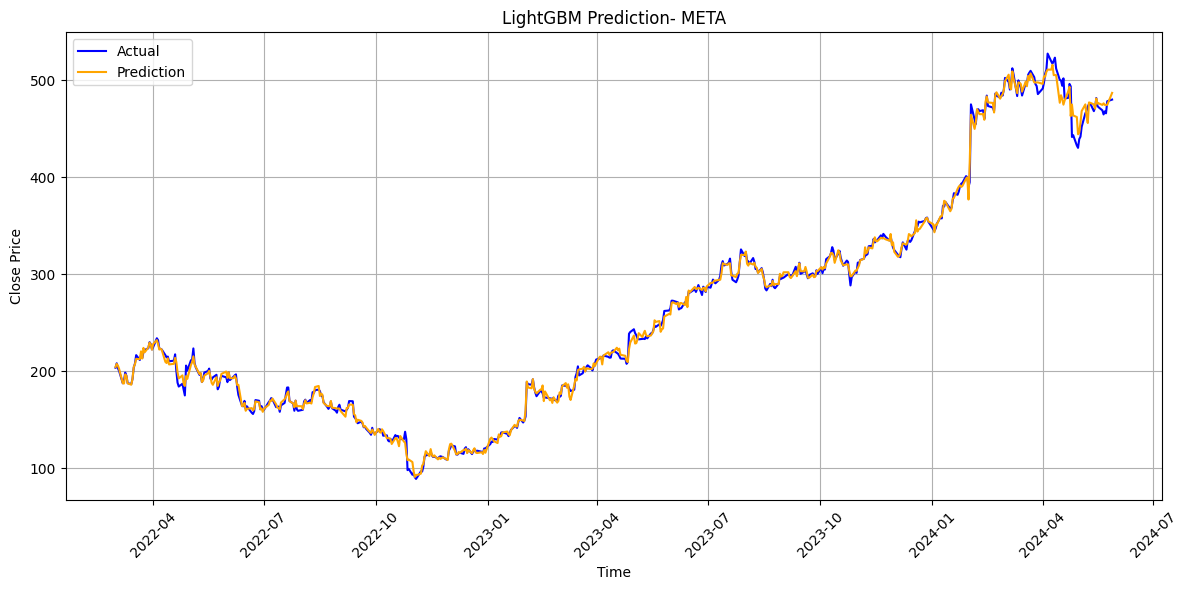

-----------------------------
Test
R2 Value Test:  -2.9131
MSE Test:       17345.6288
RMSE Test:      5.3226
MAE Test:       105.0304
MAPE:           0.1724
-----------------------------


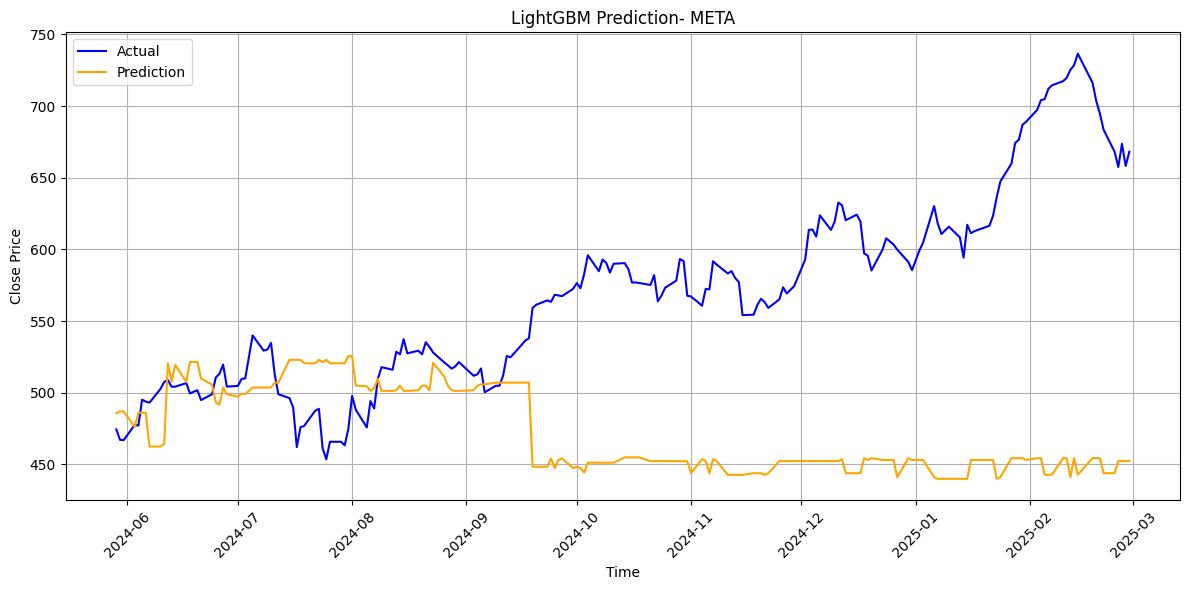

(LGBMRegressor(feature_fraction=0.7, learning_rate=0.2, max_bin=50, max_depth=3,
               min_data_in_leaf=25, n_estimators=600, random_state=42,
               verbosity=-1),
           date  actual  prediction
 564 2024-05-29  474.36  485.599434
 565 2024-05-30  467.05  486.840714
 566 2024-05-31  466.83  486.840714
 567 2024-06-03  477.49  476.078818
 568 2024-06-04  476.99  485.914021
 ..         ...     ...         ...
 748 2025-02-24  668.13  443.786674
 749 2025-02-25  657.50  452.154783
 750 2025-02-26  673.70  452.253614
 751 2025-02-27  658.24  452.154783
 752 2025-02-28  668.20  452.253614
 
 [189 rows x 3 columns])

In [ ]:
model_lightgbm(Xtrain_META, ytrain_META, XTest_META, yTest_META,
    feature_fraction=0.7,
    learning_rate=0.2,
    max_bin=50,
    max_depth=3,
    min_data_in_leaf=25,
    n_estimators=600,
    date_test=df_META['date'].iloc[train_size:],
    date_train=df_META['date'].iloc[:train_size],
    label_name='META')

##AAPL

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[30]	valid_0's l2: 1886.84
-----------------------------
Train
R2 Value Train:  0.9807
MSE Train:       6.3078
RMSE Train:      2.5115
MAE Train:       1.9278
MAPE Train:      0.0116
-----------------------------


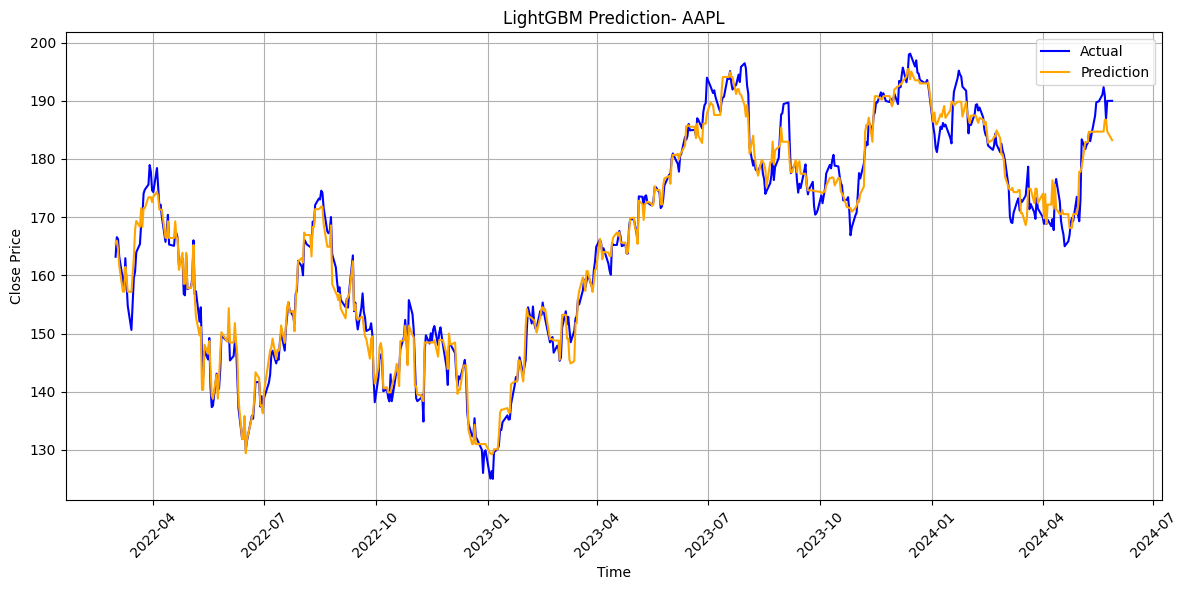

-----------------------------
Test
R2 Value Test:  -9.6101
MSE Test:       1886.8414
RMSE Test:      2.5115
MAE Test:       41.5608
MAPE:           0.1797
-----------------------------


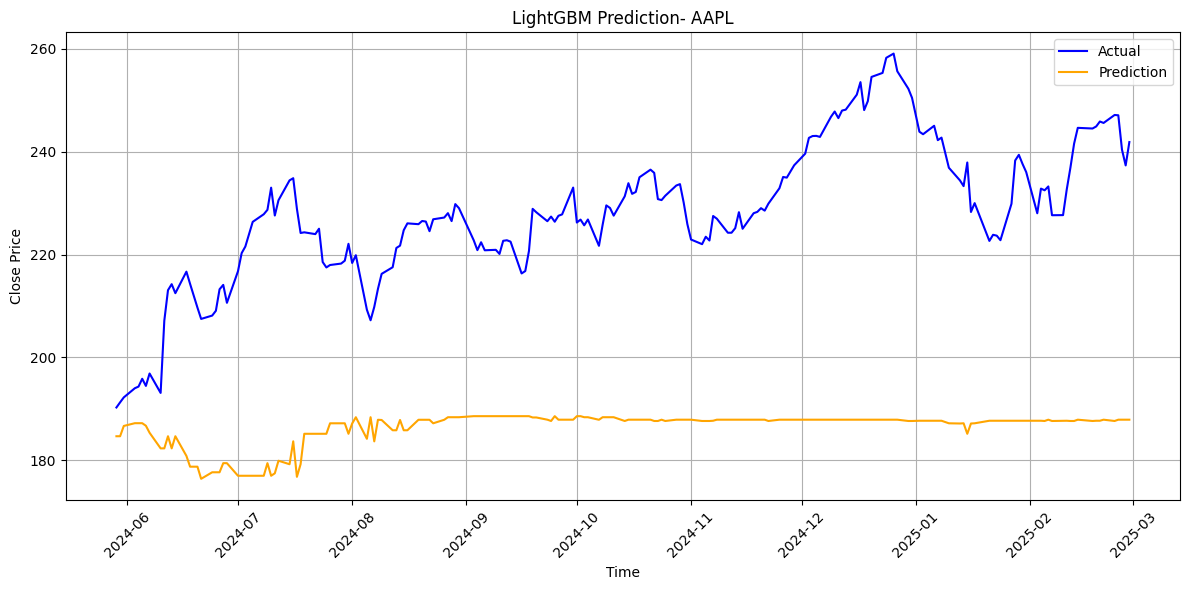

(LGBMRegressor(feature_fraction=0.9, learning_rate=0.2, max_bin=400, max_depth=3,
               min_data_in_leaf=25, n_estimators=600, random_state=42,
               verbosity=-1),
           date  actual  prediction
 564 2024-05-29  190.29  184.707366
 565 2024-05-30  191.29  184.707366
 566 2024-05-31  192.25  186.705367
 567 2024-06-03  194.03  187.240466
 568 2024-06-04  194.35  187.240466
 ..         ...     ...         ...
 748 2025-02-24  247.10  187.668447
 749 2025-02-25  247.04  187.920111
 750 2025-02-26  240.36  187.920111
 751 2025-02-27  237.30  187.920111
 752 2025-02-28  241.84  187.920111
 
 [189 rows x 3 columns])

In [ ]:
model_lightgbm(Xtrain_AAPL, ytrain_AAPL, XTest_AAPL, yTest_AAPL,
    feature_fraction=0.9,
    learning_rate=0.2,
    max_bin=400,
    max_depth=3,
    min_data_in_leaf=25,
    n_estimators=600,
    date_test=df_AAPL['date'].iloc[train_size:],
    date_train=df_AAPL['date'].iloc[:train_size],
    label_name='AAPL')

##MSFT

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	valid_0's l2: 493.159
-----------------------------
Train
R2 Value Train:  0.9965
MSE Train:       12.5949
RMSE Train:      3.5489
MAE Train:       2.7090
MAPE Train:      0.0089
-----------------------------


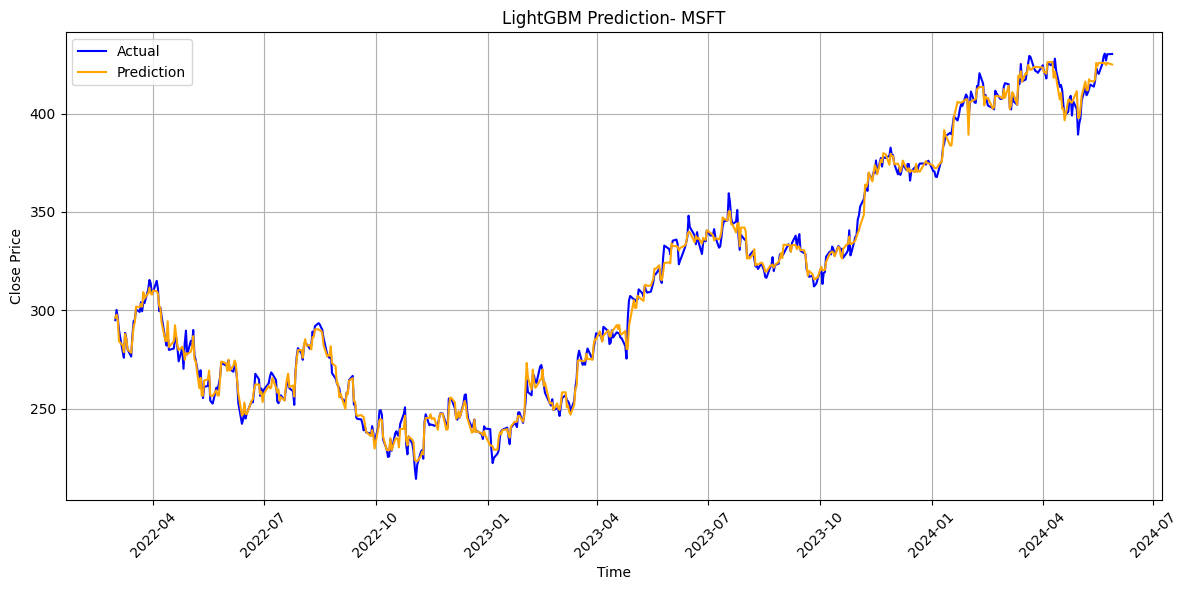

-----------------------------
Test
R2 Value Test:  -1.0273
MSE Test:       493.1593
RMSE Test:      3.5489
MAE Test:       18.3511
MAPE:           0.0423
-----------------------------


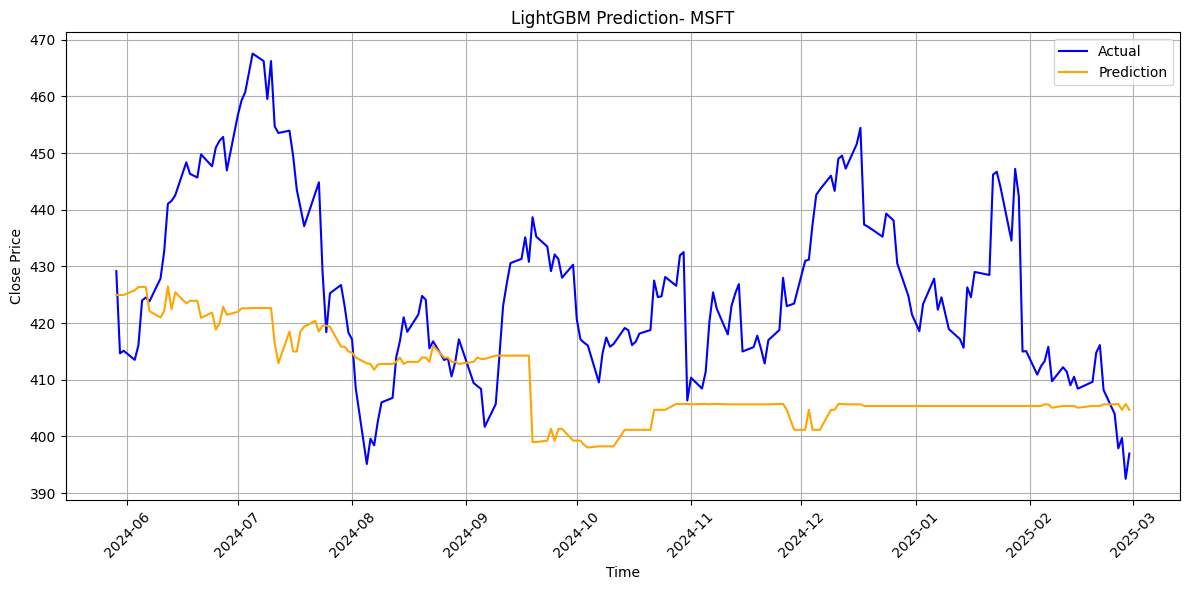

(LGBMRegressor(feature_fraction=0.9, learning_rate=0.2, max_bin=50, max_depth=3,
               min_data_in_leaf=25, n_estimators=600, random_state=42,
               verbosity=-1),
           date  actual  prediction
 564 2024-05-29  429.17  424.964450
 565 2024-05-30  414.67  424.964450
 566 2024-05-31  415.13  424.964450
 567 2024-06-03  413.52  425.793796
 568 2024-06-04  416.07  426.371256
 ..         ...     ...         ...
 748 2025-02-24  404.00  405.672968
 749 2025-02-25  397.90  405.739900
 750 2025-02-26  399.73  404.705481
 751 2025-02-27  392.53  405.739900
 752 2025-02-28  396.99  404.705481
 
 [189 rows x 3 columns])

In [ ]:
model_lightgbm(Xtrain_MSFT, ytrain_MSFT, XTest_MSFT, yTest_MSFT,
    feature_fraction=0.9,
    learning_rate=0.2,
    max_bin=50,
    max_depth=3,
    min_data_in_leaf=25,
    n_estimators=600,
    date_test=df_MSFT['date'].iloc[train_size:],
    date_train=df_MSFT['date'].iloc[:train_size],
    label_name='MSFT')

##NVDA

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[196]	valid_0's l2: 1274.26
-----------------------------
Train
R2 Value Train:  0.9975
MSE Train:       1.3895
RMSE Train:      1.1788
MAE Train:       0.7772
MAPE Train:      0.0244
-----------------------------


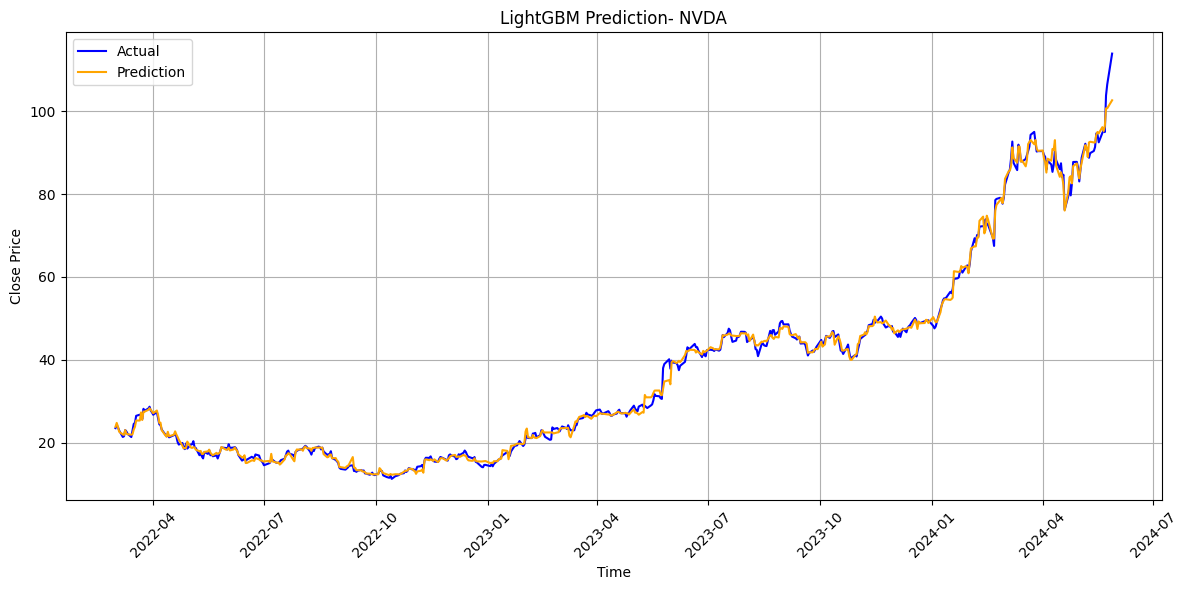

-----------------------------
Test
R2 Value Test:  -8.5003
MSE Test:       1274.2637
RMSE Test:      1.1788
MAE Test:       33.9989
MAPE:           0.2594
-----------------------------


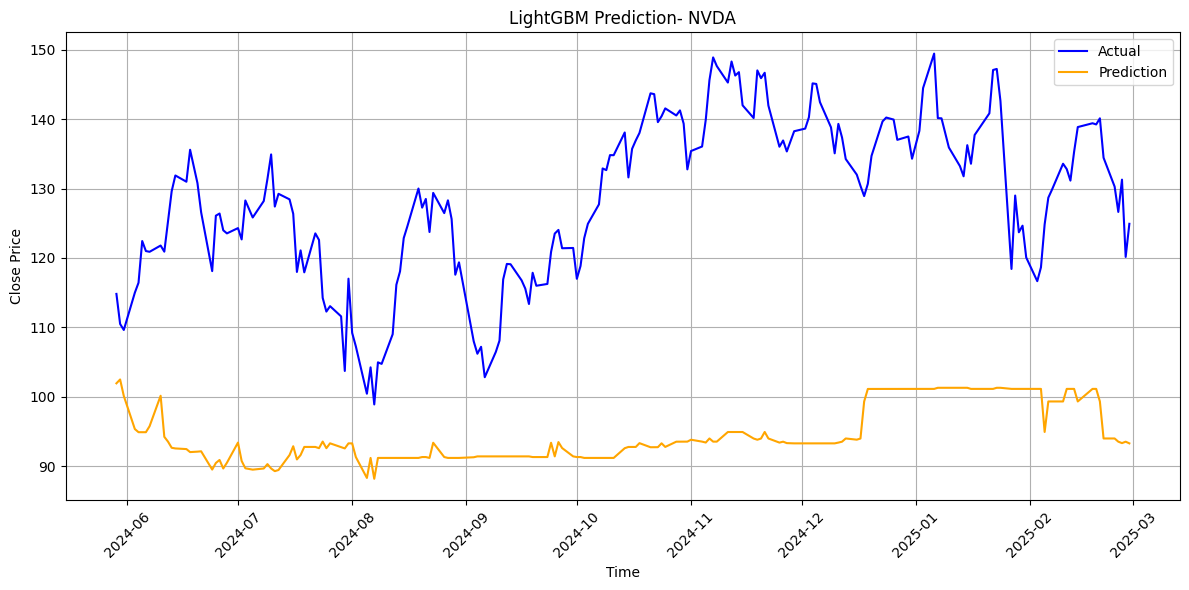

(LGBMRegressor(feature_fraction=0.8, max_bin=100, max_depth=3,
               min_data_in_leaf=25, n_estimators=200, random_state=42,
               verbosity=-1),
           date   actual  prediction
 564 2024-05-29  114.825  101.948383
 565 2024-05-30  110.500  102.504449
 566 2024-05-31  109.633  100.138267
 567 2024-06-03  115.000   95.365128
 568 2024-06-04  116.437   94.911179
 ..         ...      ...         ...
 748 2025-02-24  130.280   94.008506
 749 2025-02-25  126.630   93.546312
 750 2025-02-26  131.280   93.339018
 751 2025-02-27  120.150   93.546312
 752 2025-02-28  124.920   93.303177
 
 [189 rows x 3 columns])

In [ ]:
model_lightgbm(Xtrain_NVDA, ytrain_NVDA, XTest_NVDA, yTest_NVDA,
    feature_fraction=0.8,
    learning_rate=0.1,
    max_bin=100,
    max_depth=3,
    min_data_in_leaf=25,
    n_estimators=200,
    date_test=df_NVDA['date'].iloc[train_size:],
    date_train=df_NVDA['date'].iloc[:train_size],
    label_name='NVDA')

##GOOG

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[22]	valid_0's l2: 281.567
-----------------------------
Train
R2 Value Train:  0.9810
MSE Train:       8.1182
RMSE Train:      2.8492
MAE Train:       2.1035
MAPE Train:      0.0171
-----------------------------


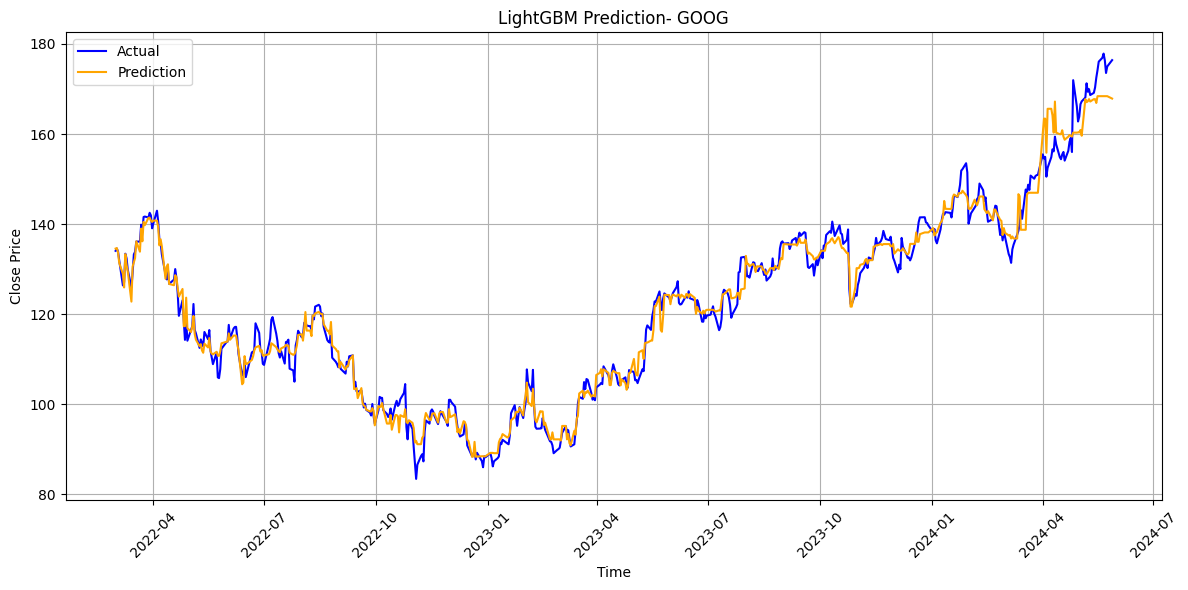

-----------------------------
Test
R2 Value Test:  -0.7331
MSE Test:       281.5669
RMSE Test:      2.8492
MAE Test:       12.9648
MAPE:           0.0702
-----------------------------


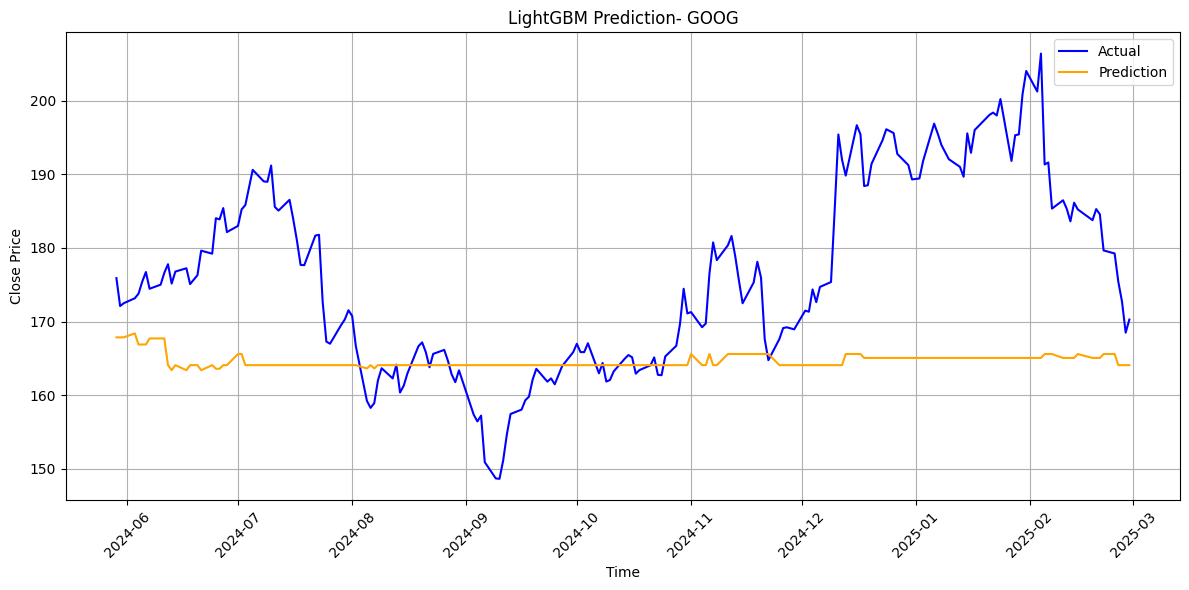

(LGBMRegressor(feature_fraction=0.6, learning_rate=0.2, max_bin=50, max_depth=5,
               min_data_in_leaf=25, n_estimators=600, random_state=42,
               verbosity=-1),
           date  actual  prediction
 564 2024-05-29  175.90  167.864403
 565 2024-05-30  172.11  167.864403
 566 2024-05-31  172.50  167.864403
 567 2024-06-03  173.17  168.398781
 568 2024-06-04  173.79  166.888436
 ..         ...     ...         ...
 748 2025-02-24  179.25  165.600314
 749 2025-02-25  175.42  164.089969
 750 2025-02-26  172.73  164.089969
 751 2025-02-27  168.50  164.089969
 752 2025-02-28  170.28  164.089969
 
 [189 rows x 3 columns])

In [ ]:
model_lightgbm(Xtrain_GOOG, ytrain_GOOG, XTest_GOOG, yTest_GOOG,
    feature_fraction=0.6,
    learning_rate=0.2,
    max_bin=50,
    max_depth=5,
    min_data_in_leaf=25,
    n_estimators=600,
    date_test=df_GOOG['date'].iloc[train_size:],
    date_train=df_GOOG['date'].iloc[:train_size],
    label_name='GOOG')

#XGBoost

In [ ]:
def model_XGBoost(X_train, y_train, X_test, y_test, learning_rate, max_depth,
                   alpha, reg_lambda, n_estimators, min_child_weight, colsample_bytree,
                   date_test, date_train, label_name='Dataset'):

    params = {
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'alpha': alpha,
        'reg_lambda' : reg_lambda,
        'n_estimators' : n_estimators,
        'min_child_weight' : min_child_weight,
        'colsample_bytree' : colsample_bytree,
    }
    model = XGBRegressor(**params, early_stopping_rounds = 50)
    model.fit(X_train, y_train ,
                eval_set=[(X_test, y_test)],
                verbose=False)

    # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ===== Test Metrics =====
    y_pred = model.predict(X_test)
    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {root_mean_squared_error(y_test, y_pred):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE:           {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'XGBoost Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
            'date': date_test,
            'actual': y_test,
            'prediction': y_pred
    })
    df_result.to_csv(os.path.join(path_Test,f'df_XGB_{label_name}.csv'))
    return model, df_result

##META

-----------------------------
Train
R2 Value Train:  0.9944
MSE Train:       74.8587
RMSE Train:      8.6521
MAE Train:       6.4534
MAPE Train:      0.0305
-----------------------------


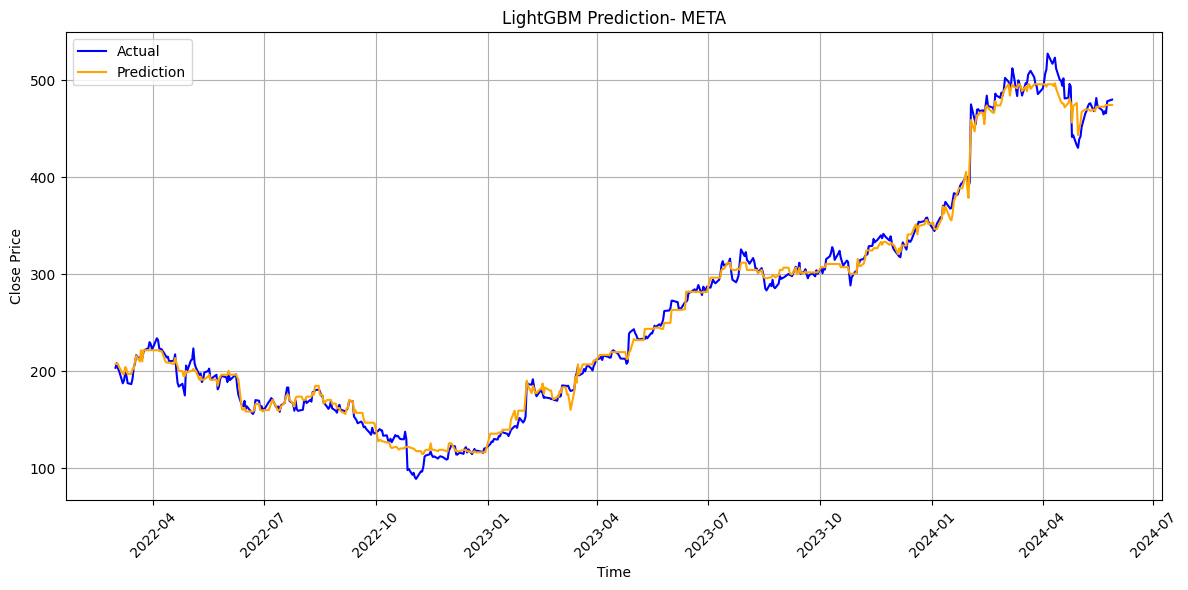

-----------------------------
Test
R2 Value Test:  -1.7102
MSE Test:       12013.5896
RMSE Test:      109.6065
MAE Test:       91.3489
MAPE:           0.1510
-----------------------------


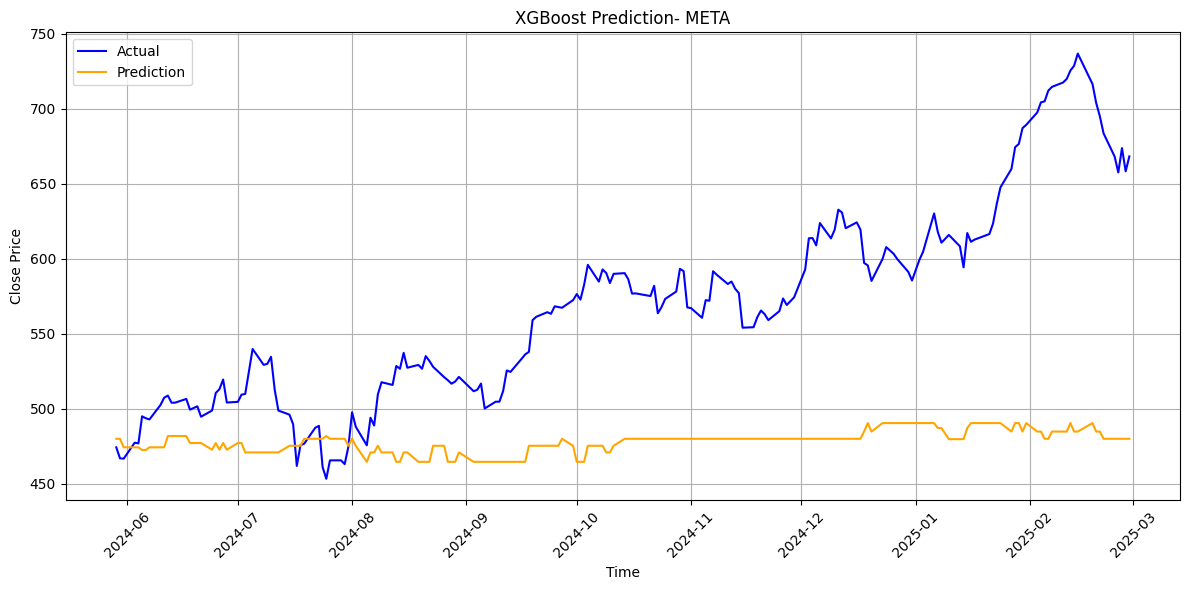

(XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, ...),
           date  actual  prediction
 564 2024-05-29  474.36  480.054138
 565 2024-05-30  467.05  480.054138
 566 2024-05-31  466.83  474.395508
 567 2024-06-03  477.49  474.395508
 568 2024-06-04  476.99  474.395508
 ..         ...     ...         ...
 748 2025-

In [ ]:
model_XGBoost(Xtrain_META, ytrain_META, XTest_META, yTest_META,
    learning_rate = 0.2,
    max_depth = 3,
    alpha = 0,
    reg_lambda = 0,
    n_estimators = 600,
    min_child_weight = 1,
    colsample_bytree = 0.7,
    date_test=df_META['date'].iloc[train_size:],
    date_train=df_META['date'].iloc[:train_size],
    label_name='META')

##AAPL

-----------------------------
Train
R2 Value Train:  0.9866
MSE Train:       4.3878
RMSE Train:      2.0947
MAE Train:       1.5919
MAPE Train:      0.0095
-----------------------------


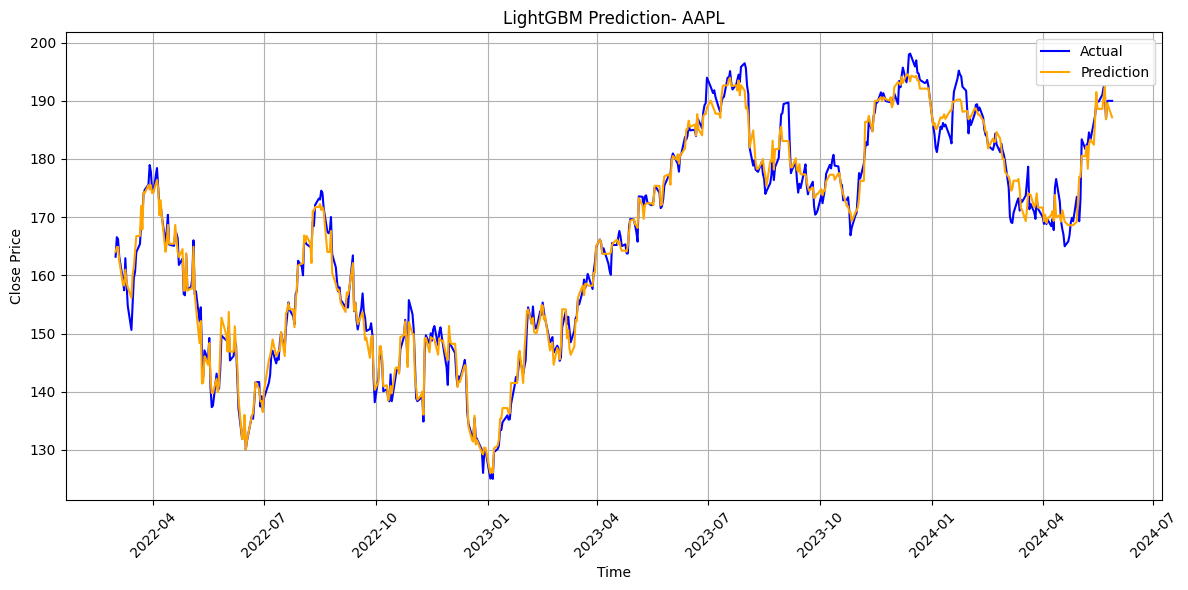

-----------------------------
Test
R2 Value Test:  -7.2197
MSE Test:       1461.7457
RMSE Test:      38.2328
MAE Test:       36.2710
MAPE:           0.1565
-----------------------------


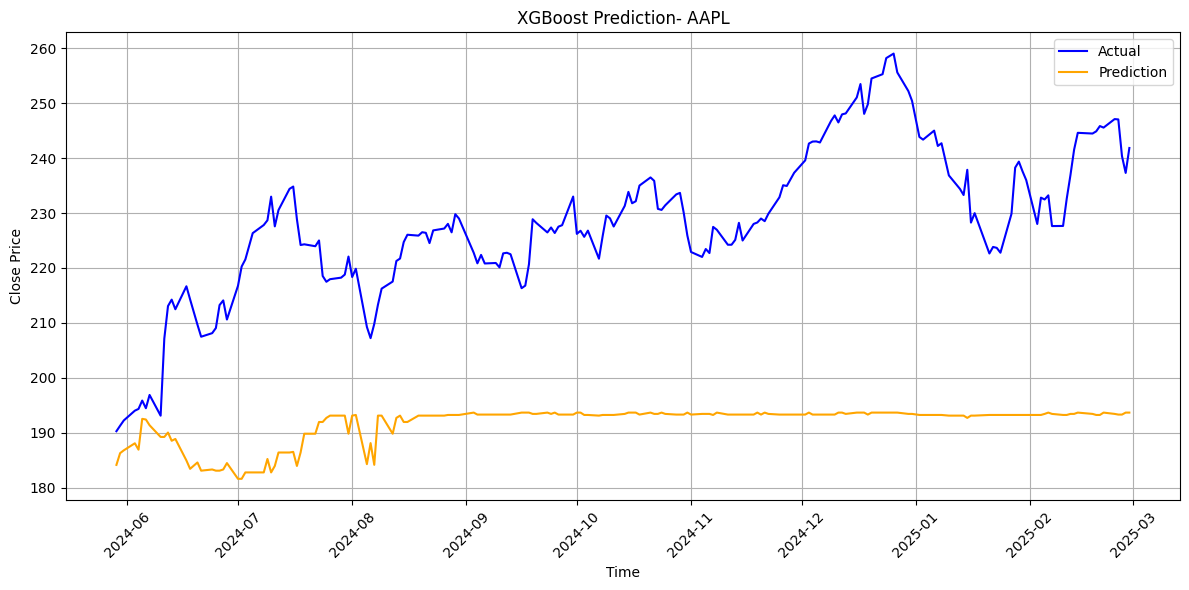

(XGBRegressor(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, ...),
           date  actual  prediction
 564 2024-05-29  190.29  184.161438
 565 2024-05-30  191.29  186.298798
 566 2024-05-31  192.25  186.811417
 567 2024-06-03  194.03  188.095108
 568 2024-06-04  194.35  186.931442
 ..         ...     ...         ...
 748 2025-

In [ ]:
model_XGBoost(Xtrain_AAPL, ytrain_AAPL, XTest_AAPL, yTest_AAPL,
    learning_rate = 0.2,
    max_depth = 3,
    alpha = 1,
    reg_lambda = 0.1,
    n_estimators = 600,
    min_child_weight = 5,
    colsample_bytree = 0.7,
    date_test=df_AAPL['date'].iloc[train_size:],
    date_train=df_AAPL['date'].iloc[:train_size],
    label_name='AAPL')

##MSFT

-----------------------------
Train
R2 Value Train:  0.9982
MSE Train:       6.4530
RMSE Train:      2.5403
MAE Train:       1.9555
MAPE Train:      0.0065
-----------------------------


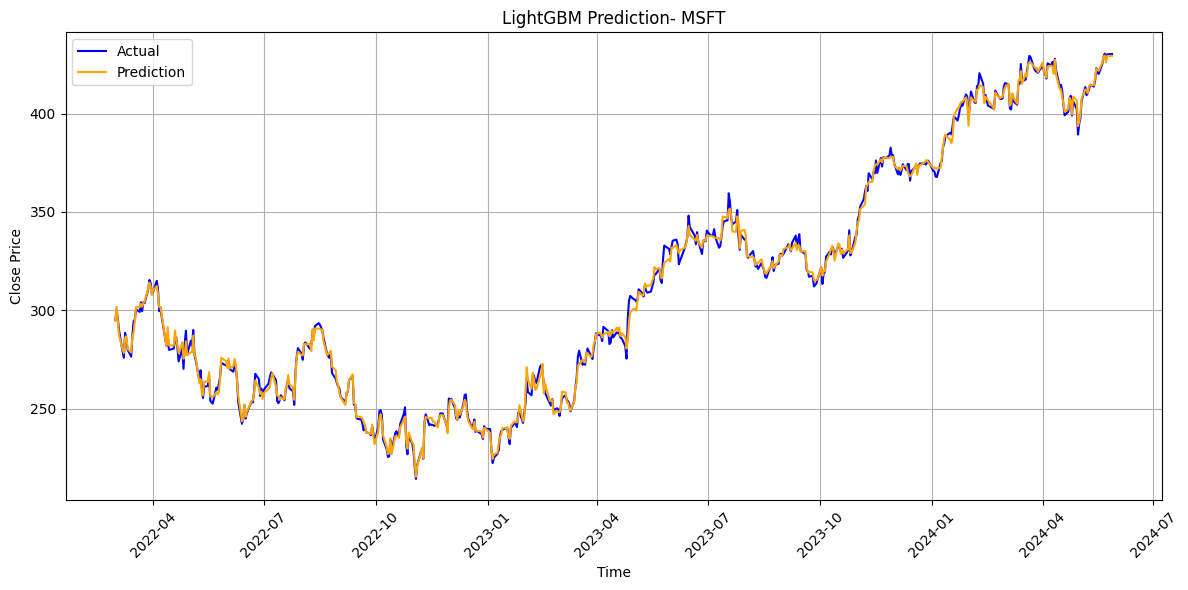

-----------------------------
Test
R2 Value Test:  -0.7529
MSE Test:       426.4081
RMSE Test:      20.6497
MAE Test:       16.7757
MAPE:           0.0386
-----------------------------


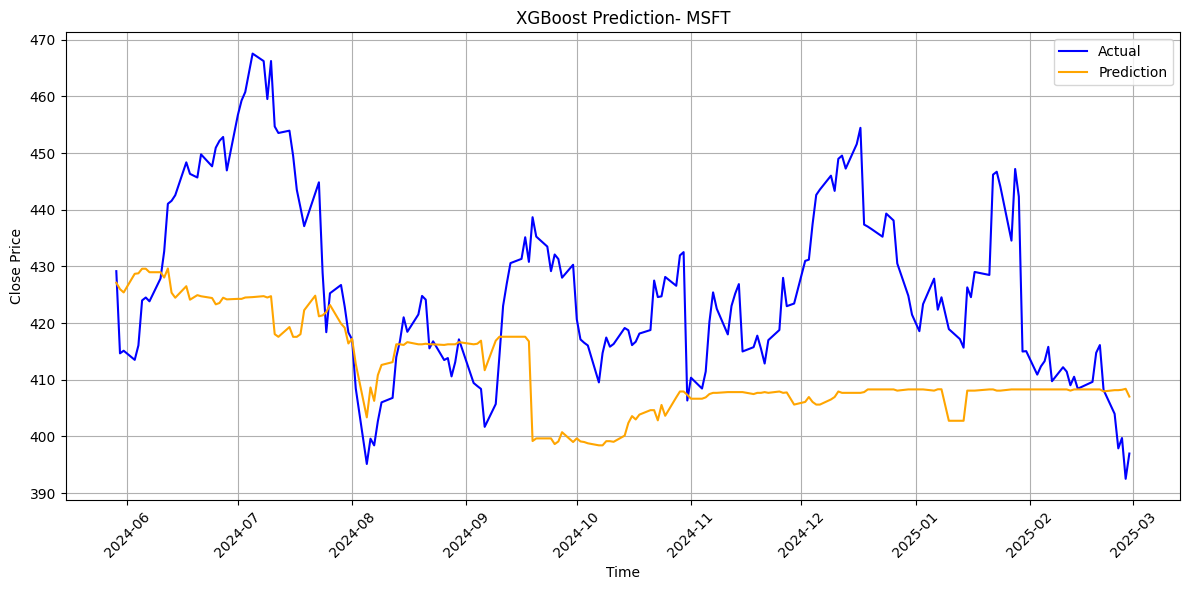

(XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, ...),
           date  actual  prediction
 564 2024-05-29  429.17  427.120972
 565 2024-05-30  414.67  426.000671
 566 2024-05-31  415.13  425.414246
 567 2024-06-03  413.52  428.706726
 568 2024-06-04  416.07  428.789276
 ..         ...     ...         ...
 748 202

In [ ]:
model_XGBoost(Xtrain_MSFT, ytrain_MSFT, XTest_MSFT, yTest_MSFT,
    learning_rate = 0.1,
    max_depth = 3,
    alpha = 0.1,
    reg_lambda = 0.1,
    n_estimators = 600,
    min_child_weight = 1,
    colsample_bytree = 0.7,
    date_test=df_MSFT['date'].iloc[train_size:],
    date_train=df_MSFT['date'].iloc[:train_size],
    label_name='MSFT')

##NVDA

-----------------------------
Train
R2 Value Train:  0.9934
MSE Train:       3.7023
RMSE Train:      1.9241
MAE Train:       1.4487
MAPE Train:      0.0480
-----------------------------


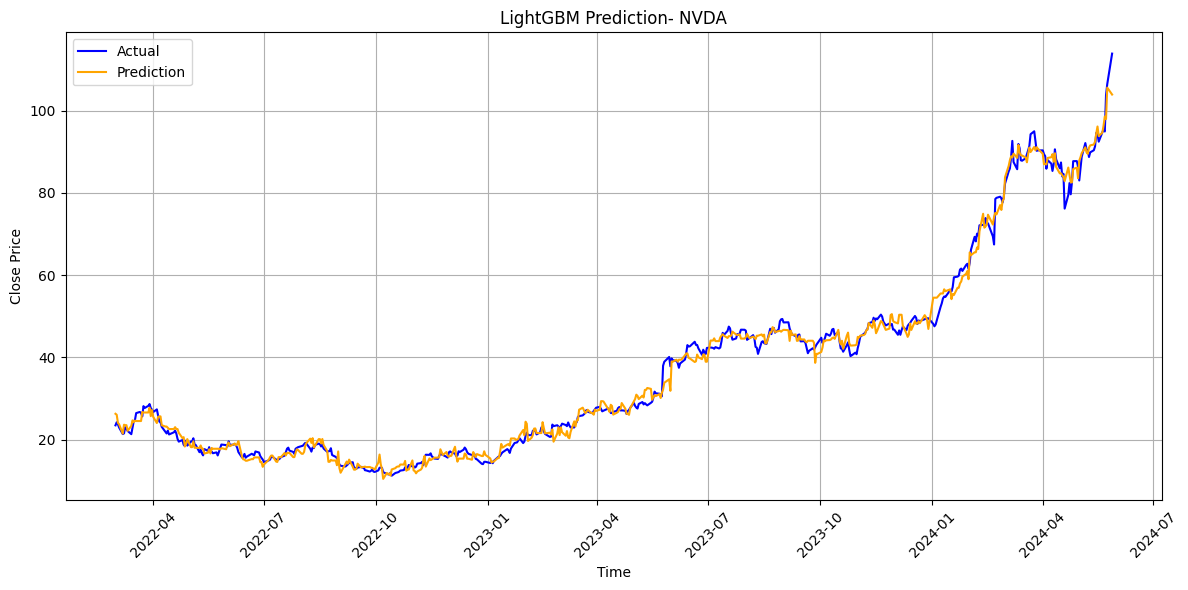

-----------------------------
Test
R2 Value Test:  -10.6382
MSE Test:       1561.0230
RMSE Test:      39.5098
MAE Test:       37.8637
MAPE:           0.2893
-----------------------------


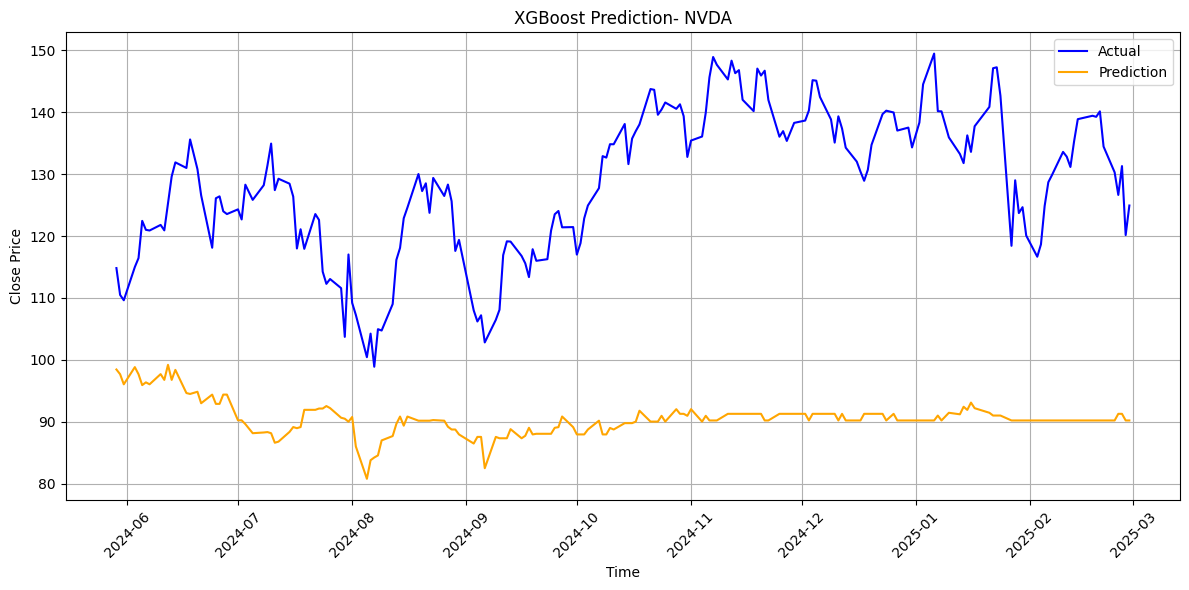

(XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.1, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, ...),
           date   actual  prediction
 564 2024-05-29  114.825   98.463692
 565 2024-05-30  110.500   97.701485
 566 2024-05-31  109.633   96.071068
 567 2024-06-03  115.000   98.847687
 568 2024-06-04  116.437   97.696724
 ..         ...      ...         ...
 74

In [ ]:
model_XGBoost(Xtrain_NVDA, ytrain_NVDA, XTest_NVDA, yTest_NVDA,
    learning_rate = 0.2,
    max_depth = 3,
    alpha = 0,
    reg_lambda = 0,
    n_estimators = 600,
    min_child_weight = 1,
    colsample_bytree = 0.1,
    date_test=df_NVDA['date'].iloc[train_size:],
    date_train=df_NVDA['date'].iloc[:train_size],
    label_name='NVDA')

##GOOG

-----------------------------
Train
R2 Value Train:  0.9976
MSE Train:       1.0401
RMSE Train:      1.0199
MAE Train:       0.7845
MAPE Train:      0.0065
-----------------------------


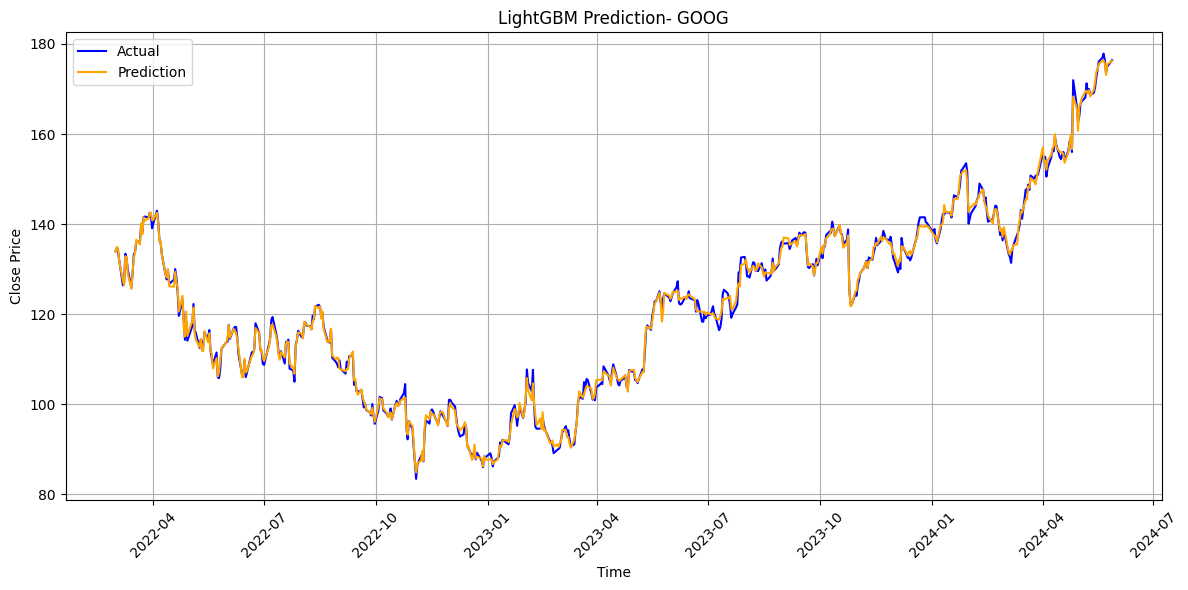

-----------------------------
Test
R2 Value Test:  -0.1883
MSE Test:       193.0609
RMSE Test:      13.8946
MAE Test:       10.7274
MAPE:           0.0588
-----------------------------


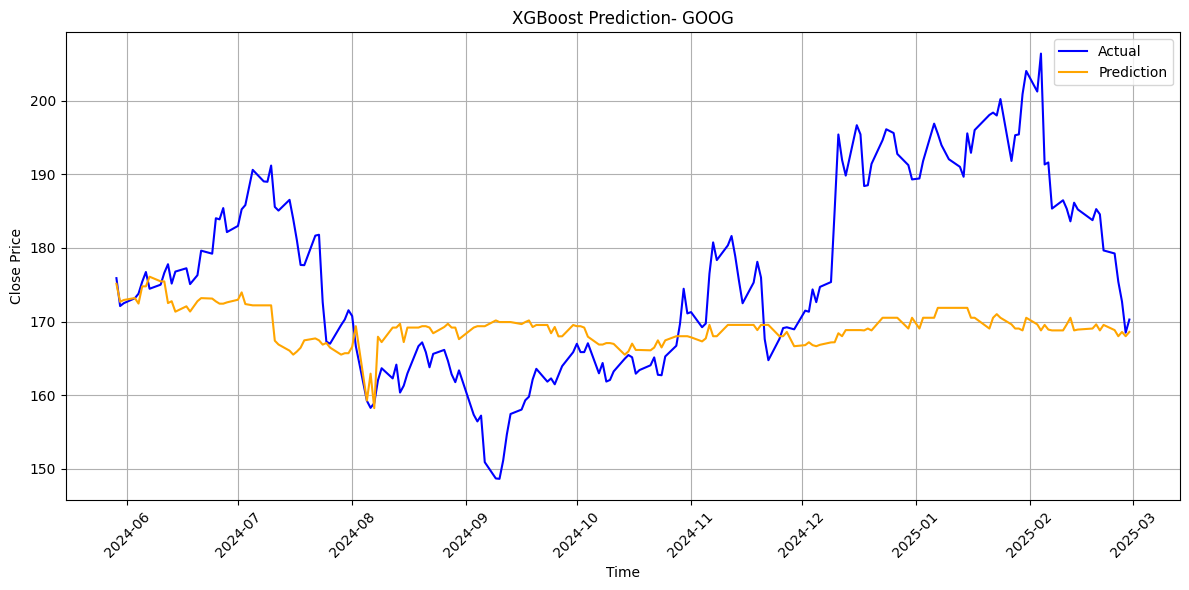

(XGBRegressor(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...),
           date  actual  prediction
 564 2024-05-29  175.90  175.138809
 565 2024-05-30  172.11  172.690125
 566 2024-05-31  172.50  172.934204
 567 2024-06-03  173.17  173.196533
 568 2024-06-04  173.79  172.447296
 ..         ...     ...         ...
 748 2025-

In [ ]:
model_XGBoost(Xtrain_GOOG, ytrain_GOOG, XTest_GOOG, yTest_GOOG,
    learning_rate = 0.2,
    max_depth = 3,
    alpha = 1,
    reg_lambda = 0.1,
    n_estimators = 200,
    min_child_weight = 5,
    colsample_bytree = 0.7,
    date_test=df_GOOG['date'].iloc[train_size:],
    date_train=df_GOOG['date'].iloc[:train_size],
    label_name='GOOG')

#RNN

In [ ]:
look_back = 10

Xtrain_META1, ytrain_META1, = [], []
for i in range(len(Xtrain_META) - look_back):
    Xtrain_META1.append(Xtrain_META[i:i + look_back])
    ytrain_META1.append(ytrain_META[i + look_back])

Xtrain_META1, ytrain_META1 = np.array(Xtrain_META1), np.array(ytrain_META1)

In [ ]:
print(Xtrain_META1.shape)
print(ytrain_META1.shape)

(554, 10, 10)
(554,)


In [ ]:
XTest_META1, yTest_META1, = [], []
for i in range(len(XTest_META) - look_back):
    XTest_META1.append(XTest_META[i:i + look_back])
    yTest_META1.append(yTest_META.iloc[i + look_back])

XTest_META1, yTest_META1 = np.array(XTest_META1), np.array(yTest_META1)

In [ ]:
print(XTest_META1.shape)
print(yTest_META1.shape)

(179, 10, 10)
(179,)


In [ ]:
Xtrain_AAPL1, ytrain_AAPL1 = [], []
for i in range(len(Xtrain_AAPL) - look_back):
    Xtrain_AAPL1.append(Xtrain_AAPL[i:i + look_back])
    ytrain_AAPL1.append(ytrain_AAPL[i + look_back])

Xtrain_AAPL1, ytrain_AAPL1 = np.array(Xtrain_AAPL1), np.array(ytrain_AAPL1)

In [ ]:
XTest_AAPL1, yTest_AAPL1, = [], []
for i in range(len(XTest_AAPL) - look_back):
    XTest_AAPL1.append(XTest_AAPL[i:i + look_back])
    yTest_AAPL1.append(yTest_AAPL.iloc[i + look_back])

XTest_AAPL1, yTest_AAPL1 = np.array(XTest_AAPL1), np.array(yTest_AAPL1)

In [ ]:
print(Xtrain_AAPL1.shape)
print(ytrain_AAPL1.shape)
print(XTest_AAPL1.shape)
print(yTest_AAPL1.shape)

(554, 10, 9)
(554,)
(179, 10, 9)
(179,)


In [ ]:
Xtrain_MSFT1, ytrain_MSFT1 = [], []
for i in range(len(Xtrain_MSFT) - look_back):
    Xtrain_MSFT1.append(Xtrain_MSFT[i:i + look_back])
    ytrain_MSFT1.append(ytrain_MSFT[i + look_back])

Xtrain_MSFT1, ytrain_MSFT1 = np.array(Xtrain_MSFT1), np.array(ytrain_MSFT1)

In [ ]:
XTest_MSFT1, yTest_MSFT1, = [], []
for i in range(len(XTest_MSFT) - look_back):
    XTest_MSFT1.append(XTest_MSFT[i:i + look_back])
    yTest_MSFT1.append(yTest_MSFT.iloc[i + look_back])

XTest_MSFT1, yTest_MSFT1 = np.array(XTest_MSFT1), np.array(yTest_MSFT1)

In [ ]:
print(Xtrain_MSFT1.shape)
print(ytrain_MSFT1.shape)
print(XTest_MSFT1.shape)
print(yTest_MSFT1.shape)

(554, 10, 10)
(554,)
(179, 10, 10)
(179,)


In [ ]:
Xtrain_NVDA1, ytrain_NVDA1 = [], []
for i in range(len(Xtrain_NVDA) - look_back):
    Xtrain_NVDA1.append(Xtrain_NVDA[i:i + look_back])
    ytrain_NVDA1.append(ytrain_NVDA[i + look_back])

Xtrain_NVDA1, ytrain_NVDA1 = np.array(Xtrain_NVDA1), np.array(ytrain_NVDA1)

In [ ]:
XTest_NVDA1, yTest_NVDA1, = [], []
for i in range(len(XTest_NVDA) - look_back):
    XTest_NVDA1.append(XTest_NVDA[i:i + look_back])
    yTest_NVDA1.append(yTest_NVDA.iloc[i + look_back])

XTest_NVDA1, yTest_NVDA1 = np.array(XTest_NVDA1), np.array(yTest_NVDA1)

In [ ]:
print(Xtrain_NVDA1.shape)
print(ytrain_NVDA1.shape)
print(XTest_NVDA1.shape)
print(yTest_NVDA1.shape)

(554, 10, 10)
(554,)
(179, 10, 10)
(179,)


In [ ]:
Xtrain_GOOG1, ytrain_GOOG1 = [], []
for i in range(len(Xtrain_GOOG) - look_back):
    Xtrain_GOOG1.append(Xtrain_GOOG[i:i + look_back])
    ytrain_GOOG1.append(ytrain_GOOG[i + look_back])

Xtrain_GOOG1, ytrain_GOOG1 = np.array(Xtrain_GOOG1), np.array(ytrain_GOOG1)

In [ ]:
XTest_GOOG1, yTest_GOOG1, = [], []
for i in range(len(XTest_GOOG) - look_back):
    XTest_GOOG1.append(XTest_GOOG[i:i + look_back])
    yTest_GOOG1.append(yTest_GOOG.iloc[i + look_back])

XTest_GOOG1, yTest_GOOG1 = np.array(XTest_GOOG1), np.array(yTest_GOOG1)

In [ ]:
print(Xtrain_GOOG1.shape)
print(ytrain_GOOG1.shape)
print(XTest_GOOG1.shape)
print(yTest_GOOG1.shape)

(554, 10, 9)
(554,)
(179, 10, 9)
(179,)


In [ ]:
def model_RNN(X_train, y_train, X_test, y_test, batch_size, epochs,
                   optimizer, date_test, date_train, label_name='Dataset'):
    def create_model():
        model = Sequential()
        model.add(SimpleRNN(256, input_shape=(look_back, X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mse', optimizer=optimizer)
        return model

    params = {
        'batch_size': batch_size,
        'epochs': epochs,
    }

    early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

    model = KerasRegressor(model=create_model, verbose=0, **params)
    model.fit(X_train, y_train, callbacks=[early_stopping])


    # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


    # ===== Test Metrics =====
    y_pred = model.predict(X_test)
    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {root_mean_squared_error(y_test, y_pred):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE:           {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'RNN Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
            'date': date_test,
            'actual': y_test,
            'prediction': y_pred
    })
    df_result.to_csv(os.path.join(path_Test,f'df_RNN_{label_name}.csv'))
    return model, df_result

##META

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9688
MSE Train:       425.2889
RMSE Train:      20.6225
MAE Train:       13.6015
MAPE Train:      0.0548
-----------------------------


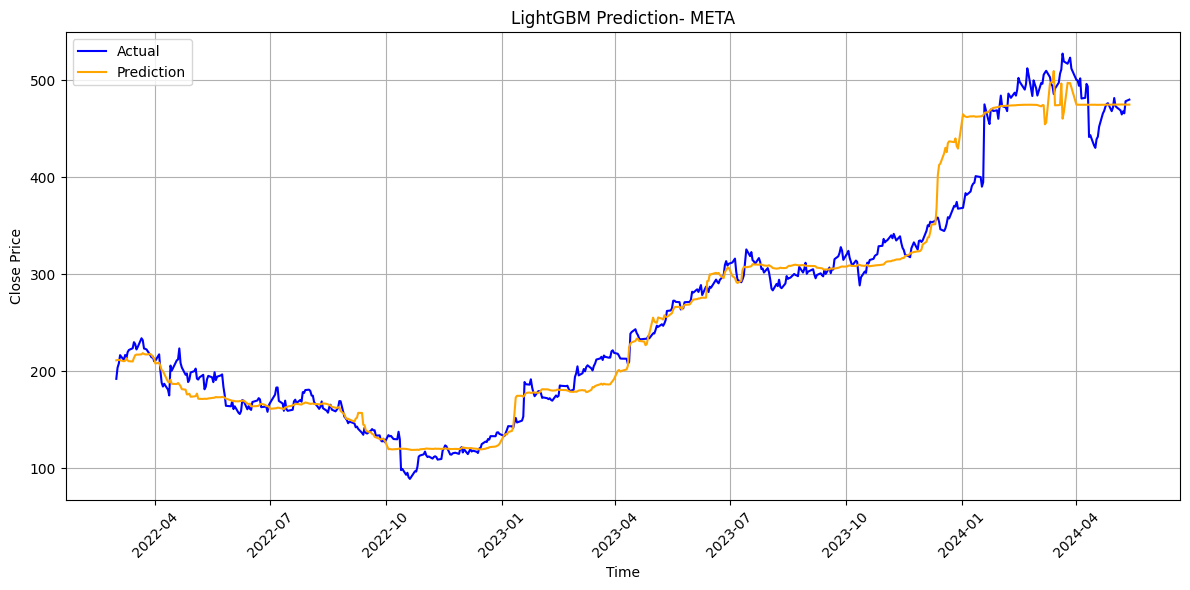

-----------------------------
Test
R2 Value Test:  -1.1749
MSE Test:       9283.3467
RMSE Test:      96.3501
MAE Test:       83.1245
MAPE:           0.1381
-----------------------------


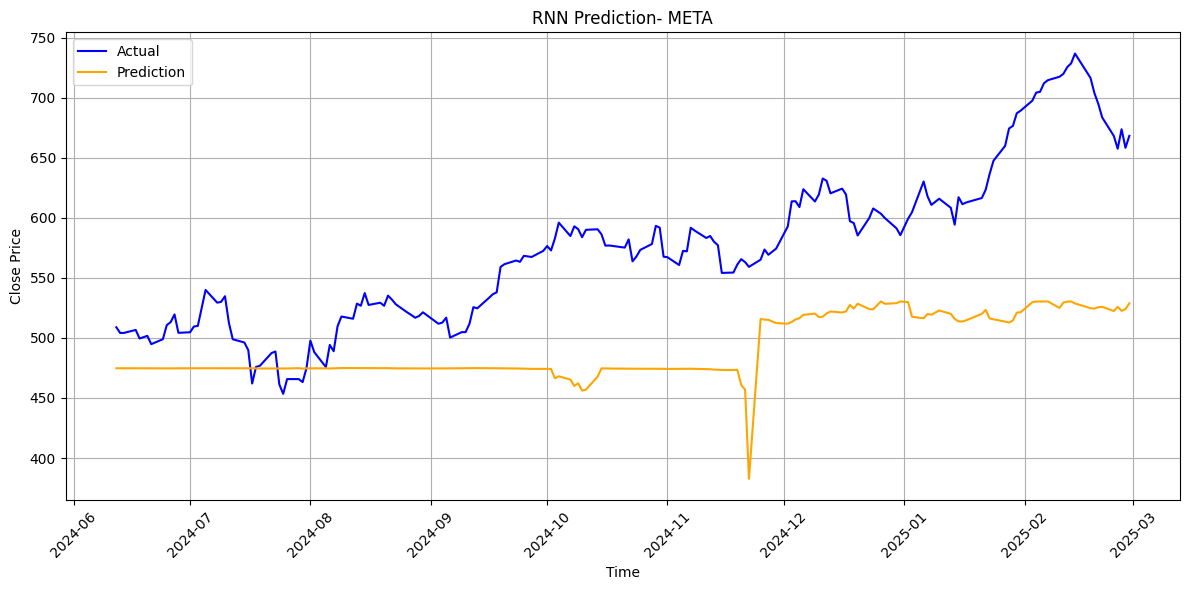

(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x79a63872d8a0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=150
 ),
           date  actual  prediction
 574 2024-06-12  508.84  474.697571
 575 2024-06-13  504.10  474.754730
 576 2024-06-14  504.16  474.728333
 577 2024-06-17  506.63  474.696075
 578 2024-06-18  499.49  474.663208
 ..         ...     ...         ...
 748 2025-02-24  668.13  522.345703
 749 2025-02-25  657.50  525.868591
 750 2025-02-26  673.70  522.479431
 751 2025-02-27  658.24  523.972900
 752 2025-02-28  668.20  528.810303
 
 [179 rows x 3 columns])

In [ ]:
model_RNN(Xtrain_META1, ytrain_META1, XTest_META1, yTest_META1,
    batch_size = 16,
    epochs = 150,
    optimizer = 'RMSprop',
    date_test=df_META['date'].iloc[train_size+10:],
    date_train=df_META['date'].iloc[:train_size-10],
    label_name='META')

##AAPL

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.7584
MSE Train:       80.1810
RMSE Train:      8.9544
MAE Train:       7.3355
MAPE Train:      0.0440
-----------------------------


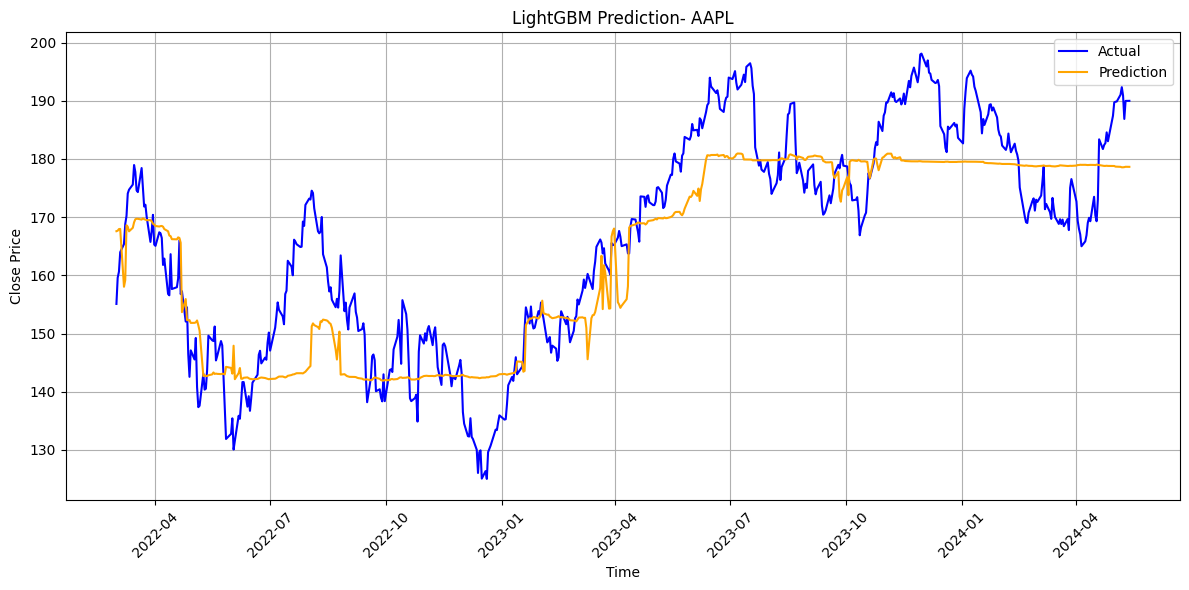

-----------------------------
Test
R2 Value Test:  -22.1265
MSE Test:       2828.4376
RMSE Test:      53.1831
MAE Test:       51.9430
MAPE:           0.2241
-----------------------------


(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x79a636304220>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=150
 ),
           date  actual  prediction
 574 2024-06-12  213.07  178.494644
 575 2024-06-13  214.24  178.442169
 576 2024-06-14  212.49  178.449265
 577 2024-06-17  216.67  178.445679
 578 2024-06-18  214.29  178.431580
 ..         ...     ...         ...
 748 2025-02-24  247.10  177.330811
 749 2025-02-25  247.04  177.461868
 750 2025-02-26  240.36  177.582855
 751 2025-02-27  237.30  177.660919
 752 2025-02-28  241.84  177.752502
 
 [179 rows x 3 columns])

In [ ]:
model_RNN(Xtrain_AAPL1, ytrain_AAPL1, XTest_AAPL1, yTest_AAPL1,
    batch_size = 16,
    epochs = 150,
    optimizer = 'RMSprop',
    date_test=df_AAPL['date'].iloc[train_size+10:],
    date_train=df_AAPL['date'].iloc[:train_size-10],
    label_name='AAPL')

##MSFT

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9500
MSE Train:       181.8003
RMSE Train:      13.4833
MAE Train:       11.0472
MAPE Train:      0.0364
-----------------------------


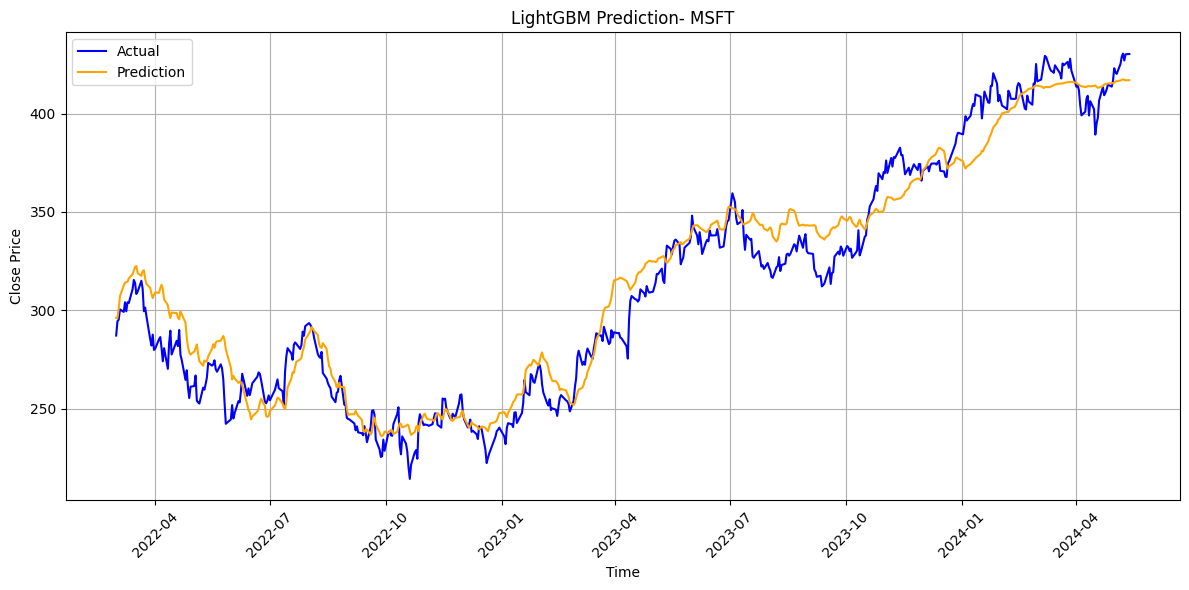

-----------------------------
Test
R2 Value Test:  -0.2209
MSE Test:       309.6144
RMSE Test:      17.5959
MAE Test:       13.3357
MAPE:           0.0306
-----------------------------


(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x79a63577d3a0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=100
 ),
           date  actual  prediction
 574 2024-06-12  441.06  417.490936
 575 2024-06-13  441.58  417.726501
 576 2024-06-14  442.57  417.702942
 577 2024-06-17  448.37  417.707733
 578 2024-06-18  446.34  417.810455
 ..         ...     ...         ...
 748 2025-02-24  404.00  420.189636
 749 2025-02-25  397.90  420.109833
 750 2025-02-26  399.73  420.019714
 751 2025-02-27  392.53  419.970581
 752 2025-02-28  396.99  419.864655
 
 [179 rows x 3 columns])

In [ ]:
model_RNN(Xtrain_MSFT1, ytrain_MSFT1, XTest_MSFT1, yTest_MSFT1,
    batch_size = 16,
    epochs = 100,
    optimizer = 'Nadam',
    date_test=df_MSFT['date'].iloc[train_size+10:],
    date_train=df_MSFT['date'].iloc[:train_size-10],
    label_name='MSFT')

##NVDA

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9639
MSE Train:       20.5784
RMSE Train:      4.5363
MAE Train:       3.1564
MAPE Train:      0.0839
-----------------------------


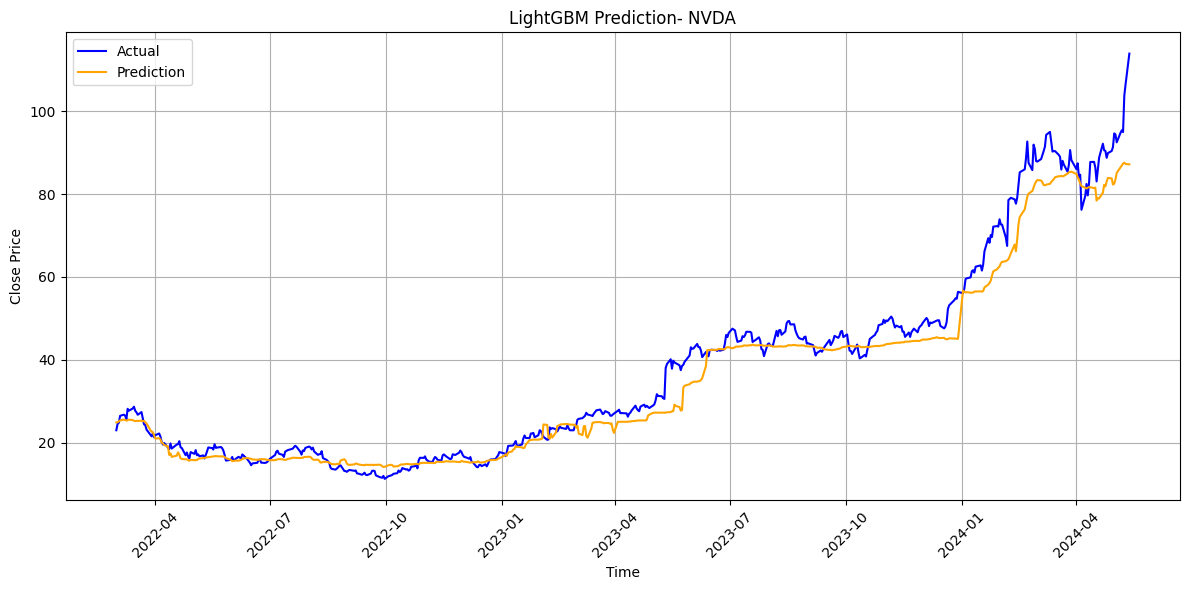

-----------------------------
Test
R2 Value Test:  -11.2565
MSE Test:       1632.8854
RMSE Test:      40.4090
MAE Test:       38.9463
MAPE:           0.2964
-----------------------------


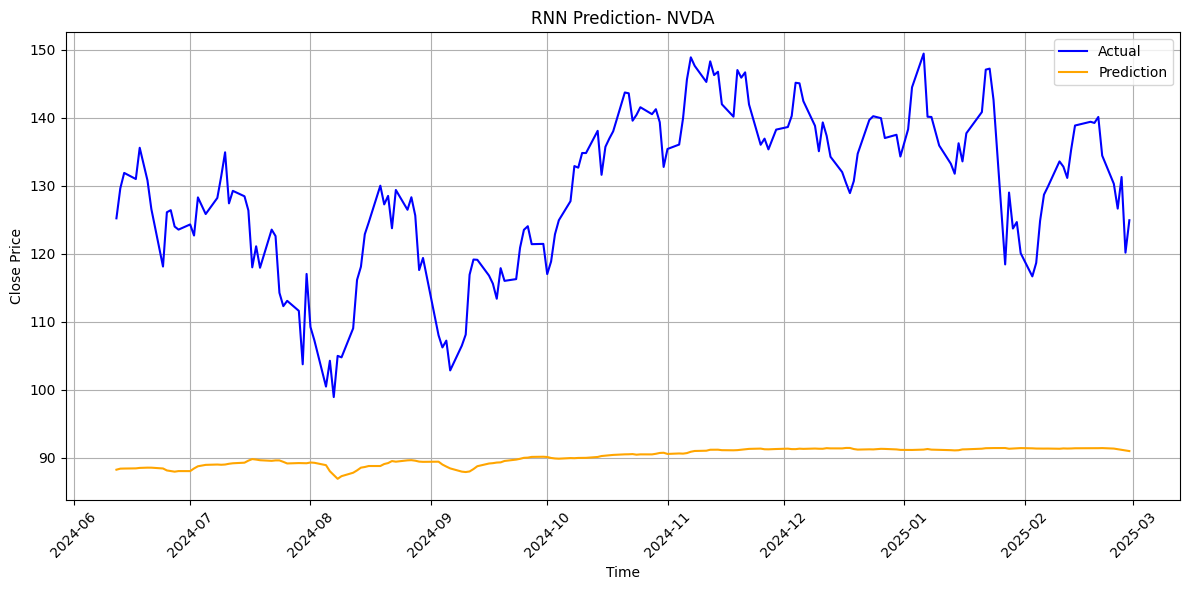

(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x79a628339da0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=150
 ),
           date  actual  prediction
 574 2024-06-12  125.20   88.226273
 575 2024-06-13  129.61   88.379616
 576 2024-06-14  131.88   88.395279
 577 2024-06-17  130.98   88.420670
 578 2024-06-18  135.58   88.488983
 ..         ...     ...         ...
 748 2025-02-24  130.28   91.331459
 749 2025-02-25  126.63   91.237961
 750 2025-02-26  131.28   91.138824
 751 2025-02-27  120.15   91.065918
 752 2025-02-28  124.92   90.965057
 
 [179 rows x 3 columns])

In [ ]:
model_RNN(Xtrain_NVDA1, ytrain_NVDA1, XTest_NVDA1, yTest_NVDA1,
    batch_size = 16,
    epochs = 150,
    optimizer = 'Adam',
    date_test=df_NVDA['date'].iloc[train_size+10:],
    date_train=df_NVDA['date'].iloc[:train_size-10],
    label_name='NVDA')

##GOOG

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.8819
MSE Train:       51.0642
RMSE Train:      7.1459
MAE Train:       5.8104
MAPE Train:      0.0467
-----------------------------


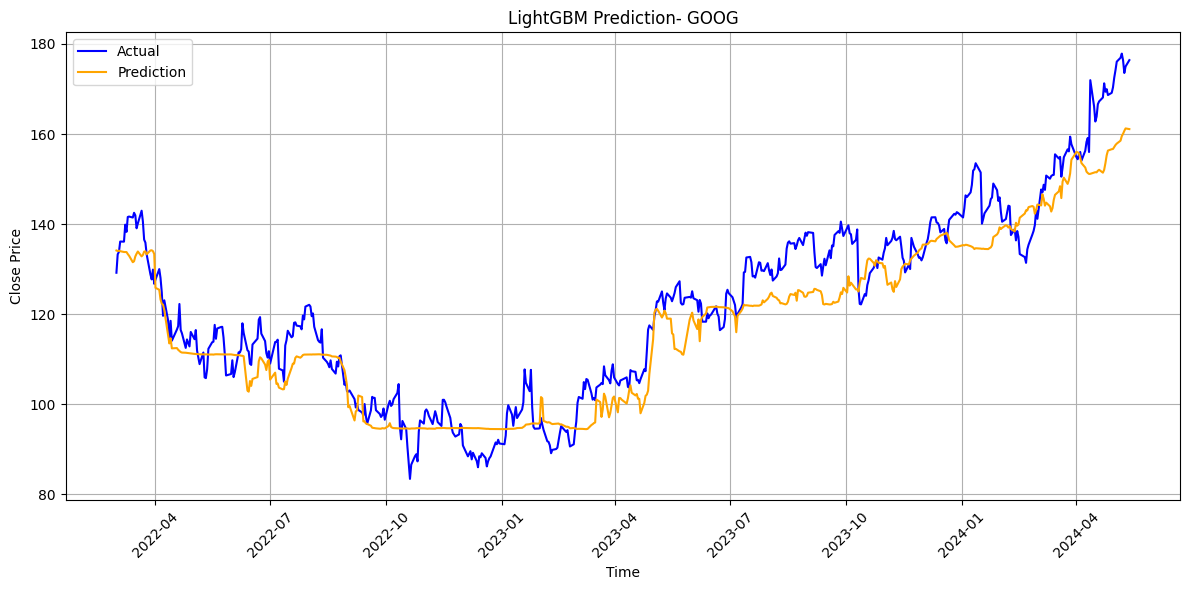

-----------------------------
Test
R2 Value Test:  0.0732
MSE Test:       158.7737
RMSE Test:      12.6005
MAE Test:       10.6872
MAPE:           0.0595
-----------------------------


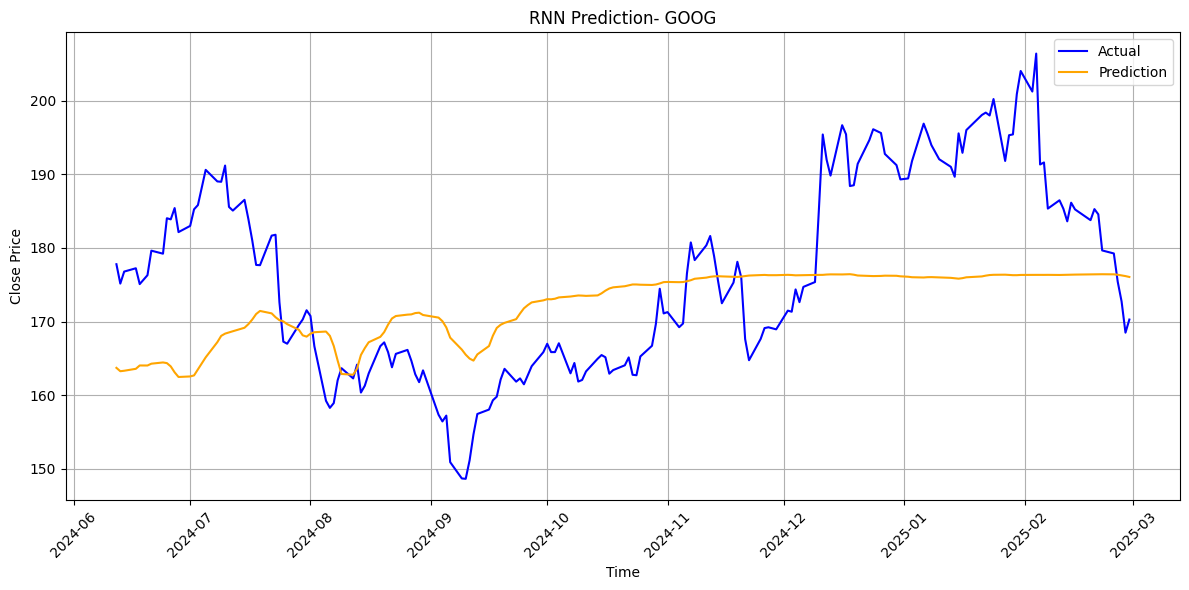

(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x79a6367519e0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  177.79  163.722092
 575 2024-06-13  175.16  163.264465
 576 2024-06-14  176.79  163.329086
 577 2024-06-17  177.24  163.591873
 578 2024-06-18  175.09  164.045227
 ..         ...     ...         ...
 748 2025-02-24  179.25  176.415100
 749 2025-02-25  175.42  176.361435
 750 2025-02-26  172.73  176.272873
 751 2025-02-27  168.50  176.178391
 752 2025-02-28  170.28  176.058304
 
 [179 rows x 3 columns])

In [ ]:
model_RNN(Xtrain_GOOG1, ytrain_GOOG1, XTest_GOOG1, yTest_GOOG1,
    batch_size = 16,
    epochs = 200,
    optimizer = 'Nadam',
    date_test=df_GOOG['date'].iloc[train_size+10:],
    date_train=df_GOOG['date'].iloc[:train_size-10],
    label_name='GOOG')

#GRU

In [ ]:
def model_GRU(X_train, y_train, X_test, y_test, batch_size, epochs,
                   optimizer, date_test, date_train, label_name='Dataset'):
    def create_model():
        model = Sequential()
        model.add(GRU(256, input_shape=(look_back, X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mse', optimizer=optimizer)
        return model


    params = {
        'batch_size': batch_size,
        'epochs': epochs,
    }

    early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

    model = KerasRegressor(model=create_model, verbose=0, **params)
    model.fit(X_train, y_train, callbacks=[early_stopping])


        # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ===== Test Metrics =====
    y_pred = model.predict(X_test)
    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {root_mean_squared_error(y_test, y_pred):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE:           {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'GRU Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
            'date': date_test,
            'actual': y_test,
            'prediction': y_pred
    })
    df_result.to_csv(os.path.join(path_Test,f'df_GRU_{label_name}.csv'))
    return model, df_result

##META

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9879
MSE Train:       165.4074
RMSE Train:      12.8611
MAE Train:       9.8722
MAPE Train:      0.0403
-----------------------------


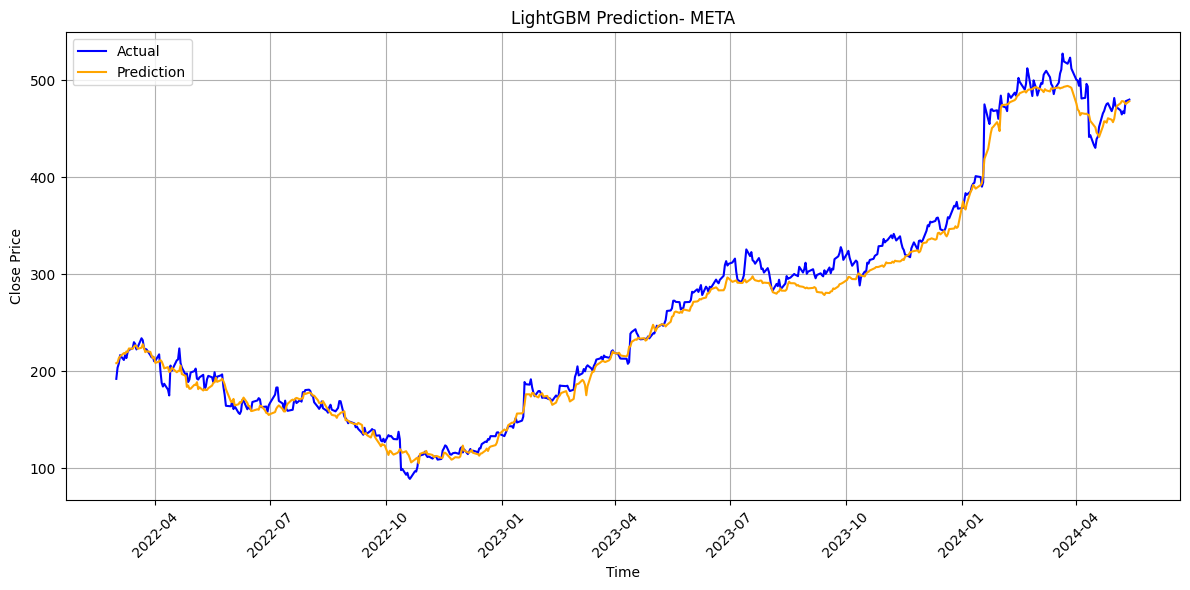

-----------------------------
Test
R2 Value Test:  -1.0851
MSE Test:       8900.0913
RMSE Test:      94.3403
MAE Test:       76.4071
MAPE:           0.1249
-----------------------------


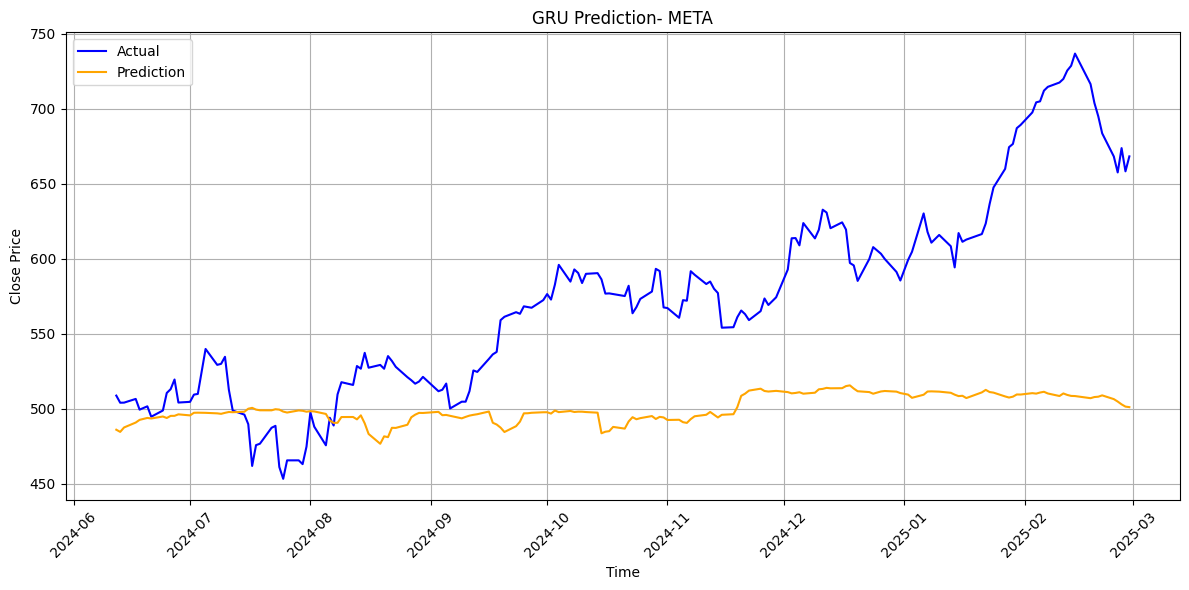

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x79a639b80860>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  508.84  486.106201
 575 2024-06-13  504.10  484.668091
 576 2024-06-14  504.16  487.618988
 577 2024-06-17  506.63  490.888672
 578 2024-06-18  499.49  492.681488
 ..         ...     ...         ...
 748 2025-02-24  668.13  506.499695
 749 2025-02-25  657.50  504.874146
 750 2025-02-26  673.70  503.003052
 751 2025-02-27  658.24  501.510437
 752 2025-02-28  668.20  501.152618
 
 [179 rows x 3 columns])

In [ ]:
model_GRU(Xtrain_META1, ytrain_META1, XTest_META1, yTest_META1,
    batch_size = 16,
    epochs = 200,
    optimizer = 'AdamW',
    date_test=df_META['date'].iloc[train_size+10:],
    date_train=df_META['date'].iloc[:train_size-10],
    label_name='META')

##AAPL

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9502
MSE Train:       16.5451
RMSE Train:      4.0676
MAE Train:       3.3289
MAPE Train:      0.0202
-----------------------------


-----------------------------
Test
R2 Value Test:  -16.2138
MSE Test:       2105.3043
RMSE Test:      45.8836
MAE Test:       43.7604
MAPE:           0.1885
-----------------------------


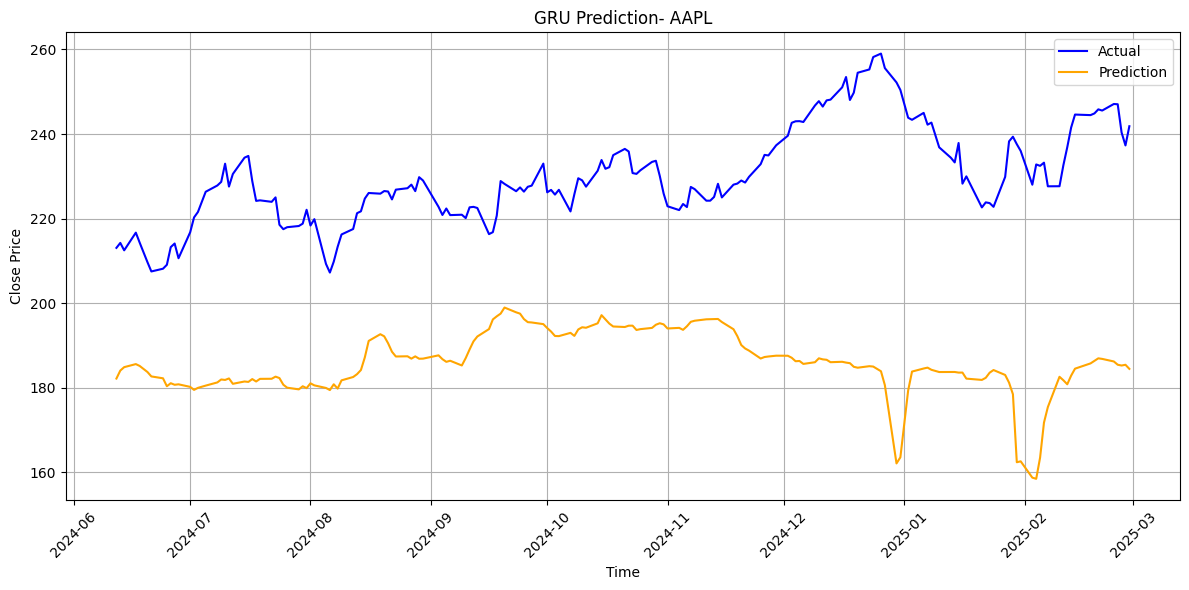

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x79a637f2ce00>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  213.07  182.160492
 575 2024-06-13  214.24  184.048691
 576 2024-06-14  212.49  184.857925
 577 2024-06-17  216.67  185.580795
 578 2024-06-18  214.29  185.136765
 ..         ...     ...         ...
 748 2025-02-24  247.10  186.202545
 749 2025-02-25  247.04  185.429520
 750 2025-02-26  240.36  185.242004
 751 2025-02-27  237.30  185.417770
 752 2025-02-28  241.84  184.452713
 
 [179 rows x 3 columns])

In [ ]:
model_GRU(Xtrain_AAPL1, ytrain_AAPL1, XTest_AAPL1, yTest_AAPL1,
    batch_size = 16,
    epochs = 200,
    optimizer = 'RMSprop',
    date_test=df_AAPL['date'].iloc[train_size+10:],
    date_train=df_AAPL['date'].iloc[:train_size-10],
    label_name='AAPL')

##MSFT

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9733
MSE Train:       97.1328
RMSE Train:      9.8556
MAE Train:       8.0122
MAPE Train:      0.0255
-----------------------------


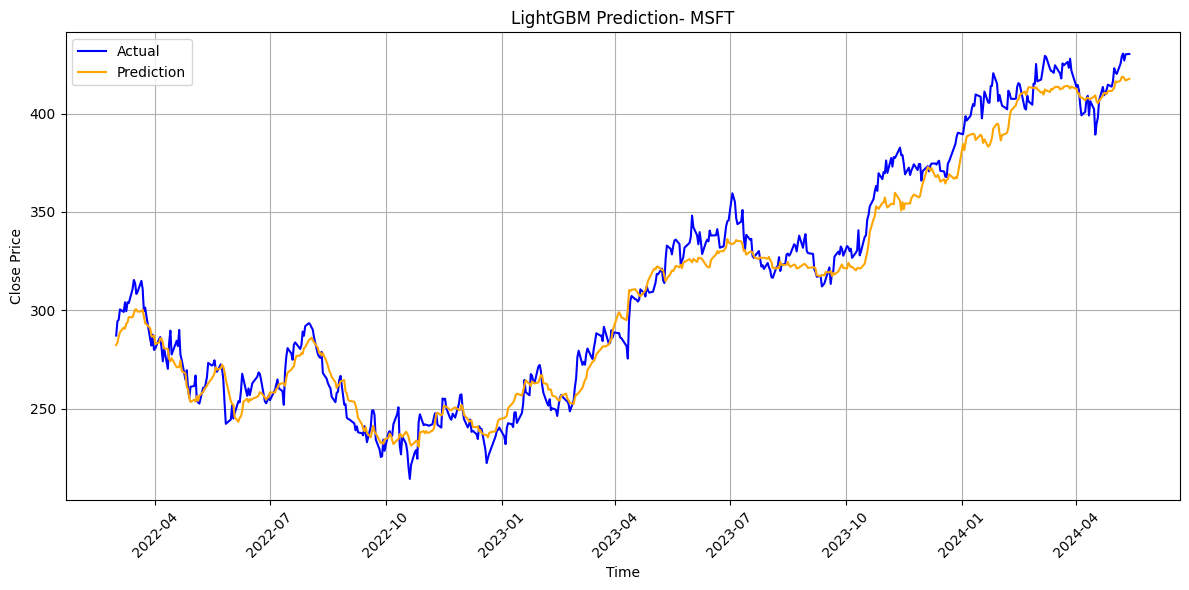

-----------------------------
Test
R2 Value Test:  -0.3637
MSE Test:       345.8294
RMSE Test:      18.5965
MAE Test:       14.9728
MAPE:           0.0351
-----------------------------


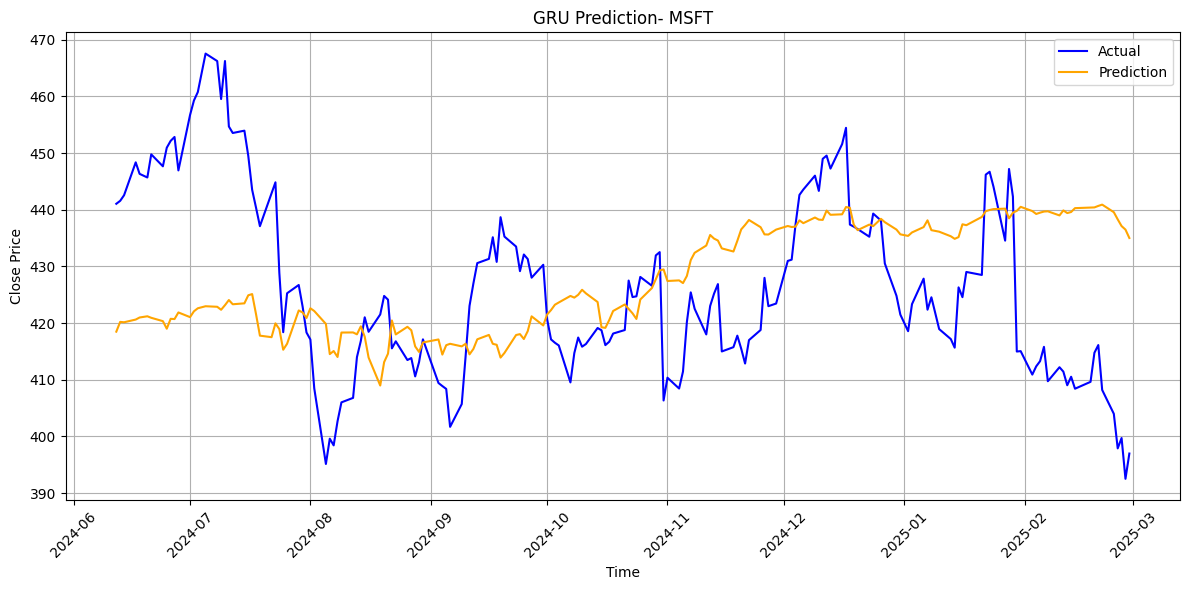

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x79a6283ef740>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=32
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  441.06  418.495758
 575 2024-06-13  441.58  420.219025
 576 2024-06-14  442.57  420.153778
 577 2024-06-17  448.37  420.631439
 578 2024-06-18  446.34  420.994171
 ..         ...     ...         ...
 748 2025-02-24  404.00  439.573700
 749 2025-02-25  397.90  438.311890
 750 2025-02-26  399.73  437.122772
 751 2025-02-27  392.53  436.505493
 752 2025-02-28  396.99  435.019501
 
 [179 rows x 3 columns])

In [ ]:
model_GRU(Xtrain_MSFT1, ytrain_MSFT1, XTest_MSFT1, yTest_MSFT1,
    batch_size = 32,
    epochs = 200,
    optimizer = 'RMSprop',
    date_test=df_MSFT['date'].iloc[train_size+10:],
    date_train=df_MSFT['date'].iloc[:train_size-10],
    label_name='MSFT')

##NVDA

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9850
MSE Train:       8.5533
RMSE Train:      2.9246
MAE Train:       2.0997
MAPE Train:      0.0591
-----------------------------


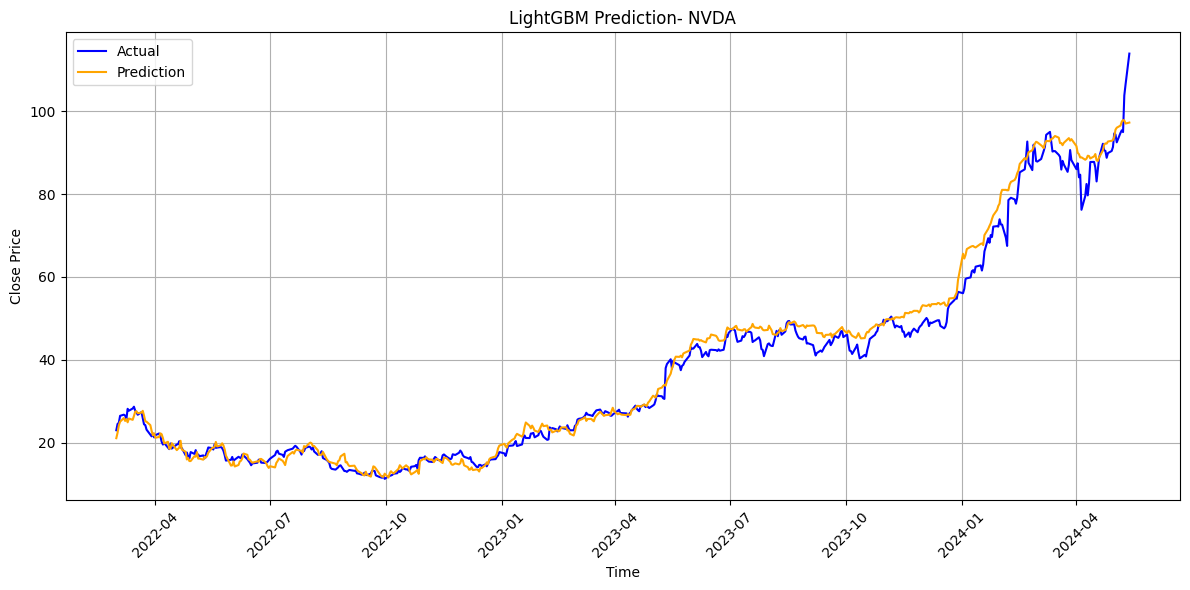

-----------------------------
Test
R2 Value Test:  -2.4784
MSE Test:       463.4093
RMSE Test:      21.5269
MAE Test:       19.6116
MAPE:           0.1478
-----------------------------


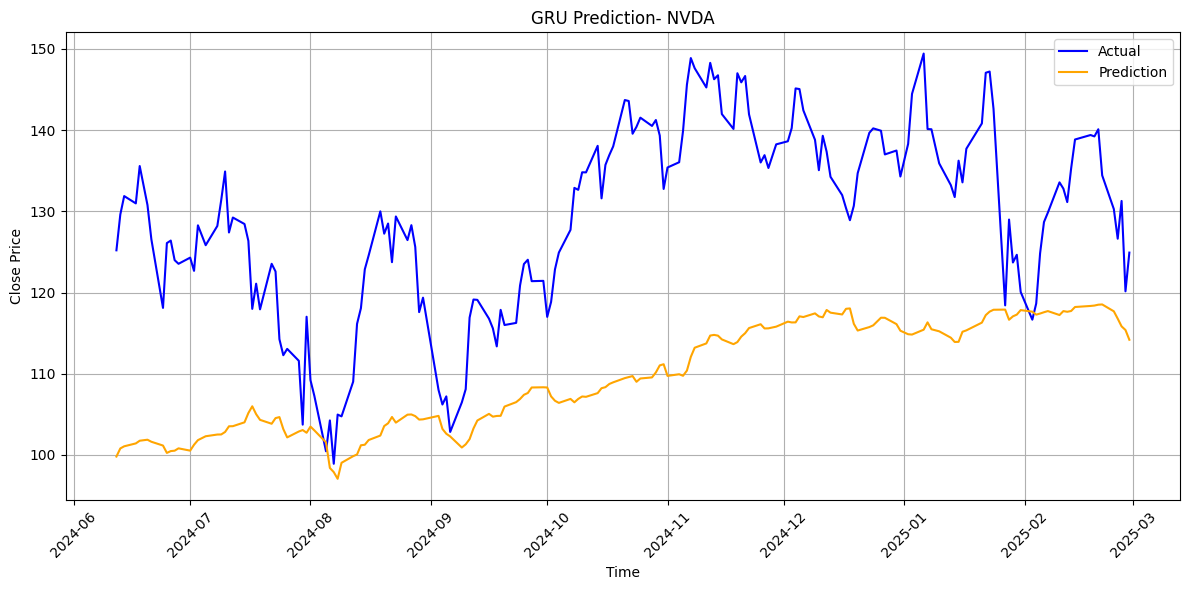

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x79a5c84359e0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=150
 ),
           date  actual  prediction
 574 2024-06-12  125.20   99.801460
 575 2024-06-13  129.61  100.798454
 576 2024-06-14  131.88  101.061760
 577 2024-06-17  130.98  101.418770
 578 2024-06-18  135.58  101.749382
 ..         ...     ...         ...
 748 2025-02-24  130.28  117.688667
 749 2025-02-25  126.63  116.784187
 750 2025-02-26  131.28  115.831093
 751 2025-02-27  120.15  115.387283
 752 2025-02-28  124.92  114.183281
 
 [179 rows x 3 columns])

In [ ]:
model_GRU(Xtrain_NVDA1, ytrain_NVDA1, XTest_NVDA1, yTest_NVDA1,
    batch_size = 16,
    epochs = 150,
    optimizer = 'Nadam',
    date_test=df_NVDA['date'].iloc[train_size+10:],
    date_train=df_NVDA['date'].iloc[:train_size-10],
    label_name='NVDA')

##GOOG

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9044
MSE Train:       41.3436
RMSE Train:      6.4299
MAE Train:       4.9491
MAPE Train:      0.0398
-----------------------------


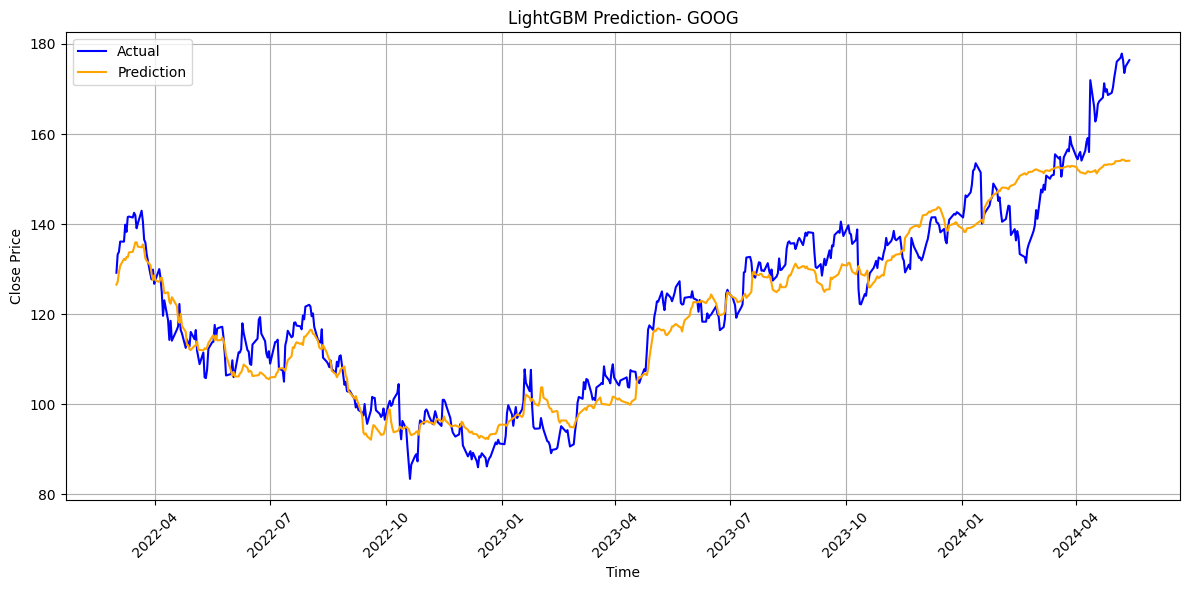

-----------------------------
Test
R2 Value Test:  -2.3048
MSE Test:       566.1228
RMSE Test:      23.7933
MAE Test:       20.3102
MAPE:           0.1109
-----------------------------


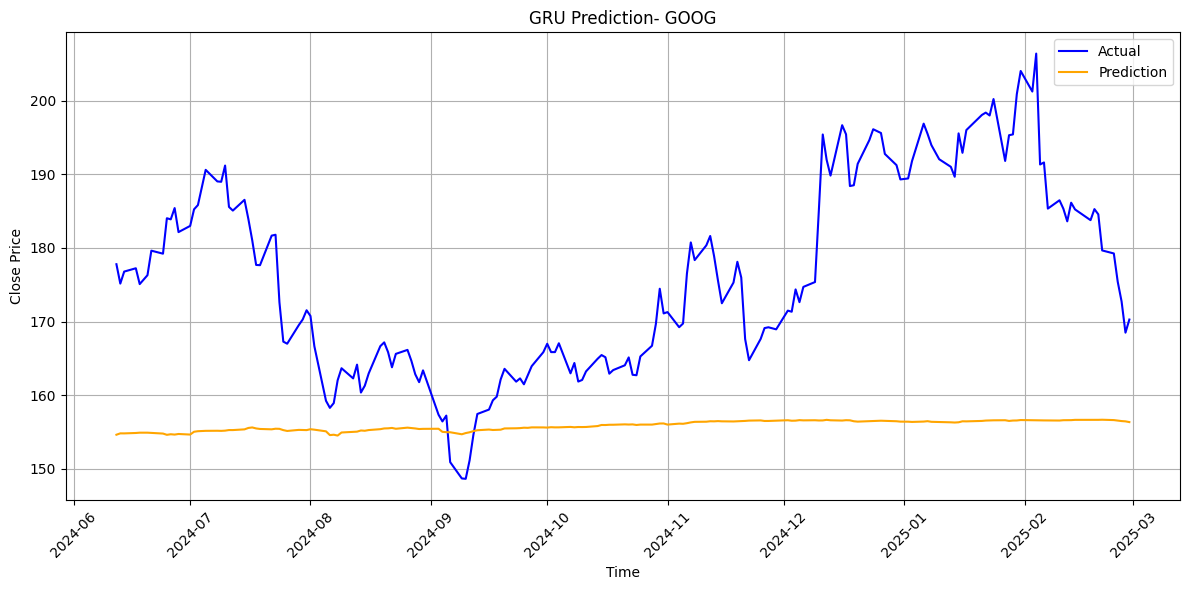

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x79a5c815aca0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=32
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=150
 ),
           date  actual  prediction
 574 2024-06-12  177.79  154.644012
 575 2024-06-13  175.16  154.830566
 576 2024-06-14  176.79  154.825851
 577 2024-06-17  177.24  154.881088
 578 2024-06-18  175.09  154.921951
 ..         ...     ...         ...
 748 2025-02-24  179.25  156.631607
 749 2025-02-25  175.42  156.565125
 750 2025-02-26  172.73  156.498657
 751 2025-02-27  168.50  156.459656
 752 2025-02-28  170.28  156.359146
 
 [179 rows x 3 columns])

In [ ]:
model_GRU(Xtrain_GOOG1, ytrain_GOOG1, XTest_GOOG1, yTest_GOOG1,
    batch_size = 32,
    epochs = 150,
    optimizer = 'Adam',
    date_test=df_GOOG['date'].iloc[train_size+10:],
    date_train=df_GOOG['date'].iloc[:train_size-10],
    label_name='GOOG')

#LSTM

In [ ]:
def model_LSTM(X_train, y_train, X_test, y_test, batch_size, epochs,
                   optimizer, date_test, date_train, label_name='Dataset'):
    def create_model():
        model = Sequential()
        model.add(LSTM(256, input_shape=(look_back, X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mse', optimizer=optimizer)
        return model

    params = {
        'batch_size': batch_size,
        'epochs': epochs,
    }

    early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

    model = KerasRegressor(model=create_model, verbose=0, **params)
    model.fit(X_train, y_train, callbacks=[early_stopping])

        # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ===== Test Metrics =====
    y_pred = model.predict(X_test)
    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {root_mean_squared_error(y_test, y_pred):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE:           {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LSTM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
            'date': date_test,
            'actual': y_test,
            'prediction': y_pred
    })
    df_result.to_csv(os.path.join(path_Test,f'df_LSTM_{label_name}.csv'))
    return model, df_result

##META

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9887
MSE Train:       154.0499
RMSE Train:      12.4117
MAE Train:       9.6038
MAPE Train:      0.0460
-----------------------------


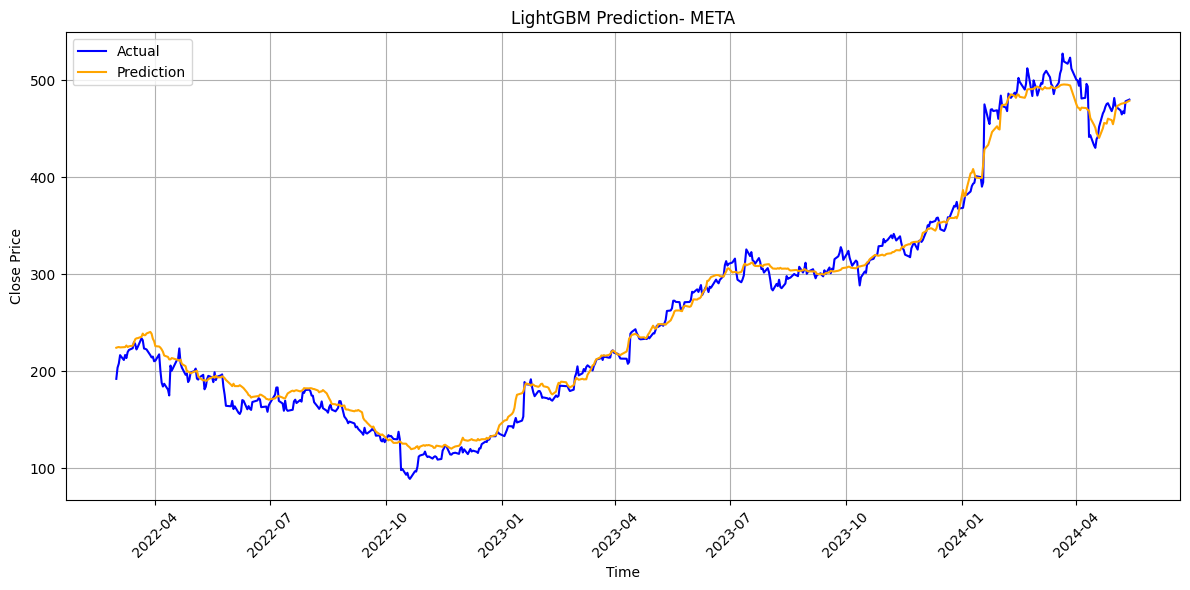

-----------------------------
Test
R2 Value Test:  -1.2952
MSE Test:       9797.0727
RMSE Test:      98.9802
MAE Test:       79.8135
MAPE:           0.1303
-----------------------------


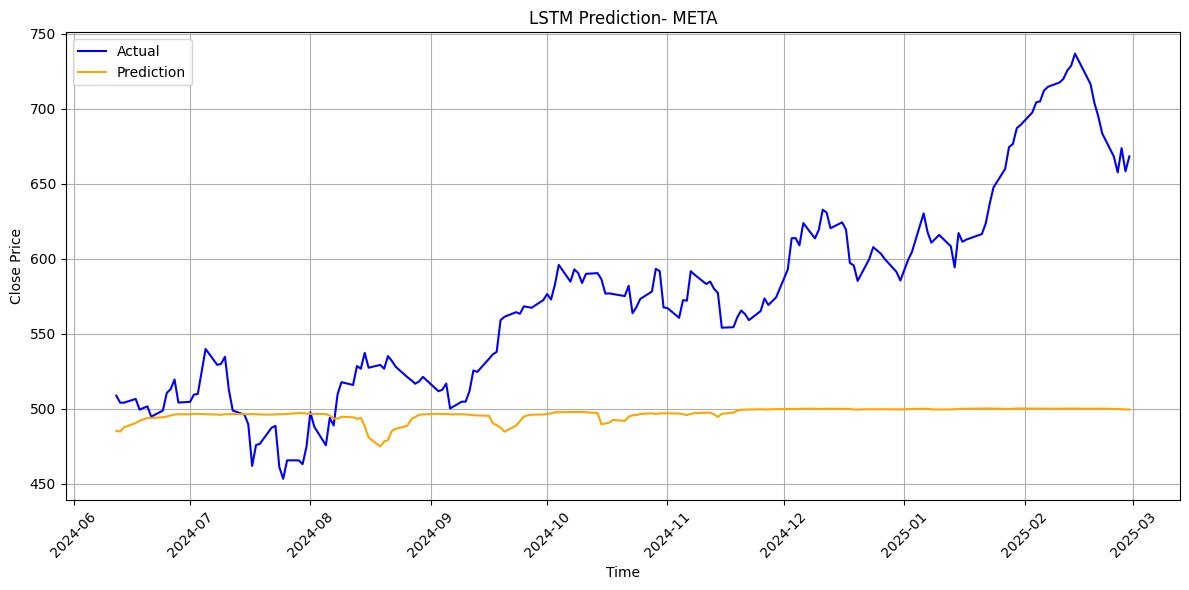

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x79a5c81e3d80>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=100
 ),
           date  actual  prediction
 574 2024-06-12  508.84  485.449097
 575 2024-06-13  504.10  484.842194
 576 2024-06-14  504.16  487.756226
 577 2024-06-17  506.63  490.522766
 578 2024-06-18  499.49  492.141968
 ..         ...     ...         ...
 748 2025-02-24  668.13  500.007538
 749 2025-02-25  657.50  499.886475
 750 2025-02-26  673.70  499.766296
 751 2025-02-27  658.24  499.687531
 752 2025-02-28  668.20  499.562531
 
 [179 rows x 3 columns])

In [ ]:
model_LSTM(Xtrain_META1, ytrain_META1, XTest_META1, yTest_META1,
    batch_size = 16,
    epochs = 100,
    optimizer = 'Nadam',
    date_test=df_META['date'].iloc[train_size+10:],
    date_train=df_META['date'].iloc[:train_size-10],
    label_name='META')

##AAPL

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9024
MSE Train:       32.4084
RMSE Train:      5.6928
MAE Train:       4.7189
MAPE Train:      0.0282
-----------------------------


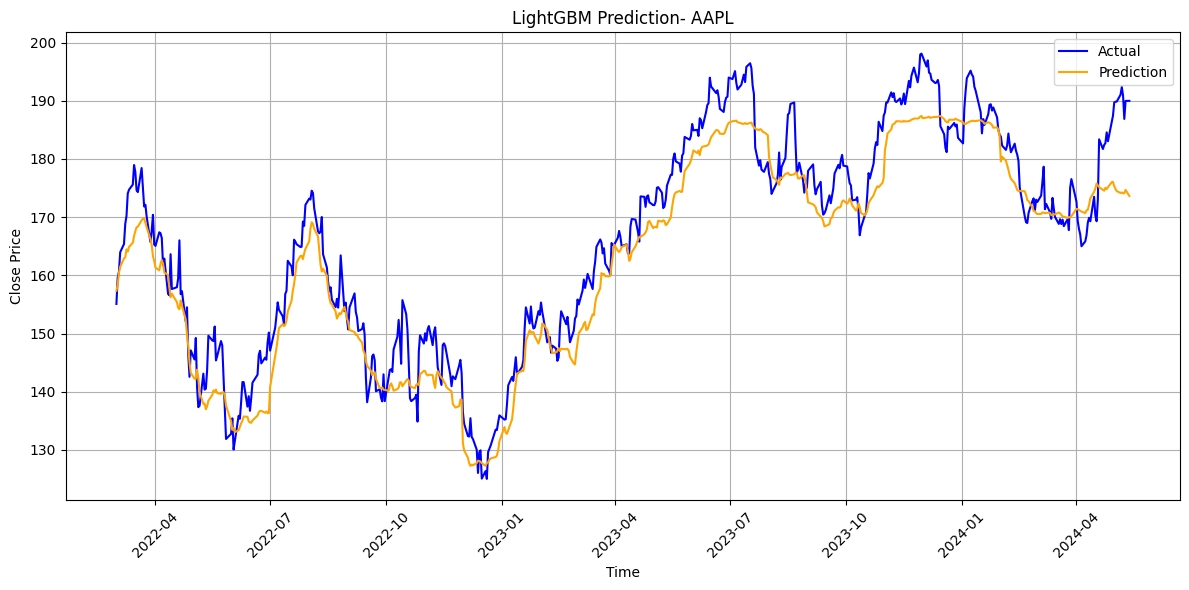

-----------------------------
Test
R2 Value Test:  -25.1759
MSE Test:       3201.3886
RMSE Test:      56.5808
MAE Test:       55.3988
MAPE:           0.2393
-----------------------------


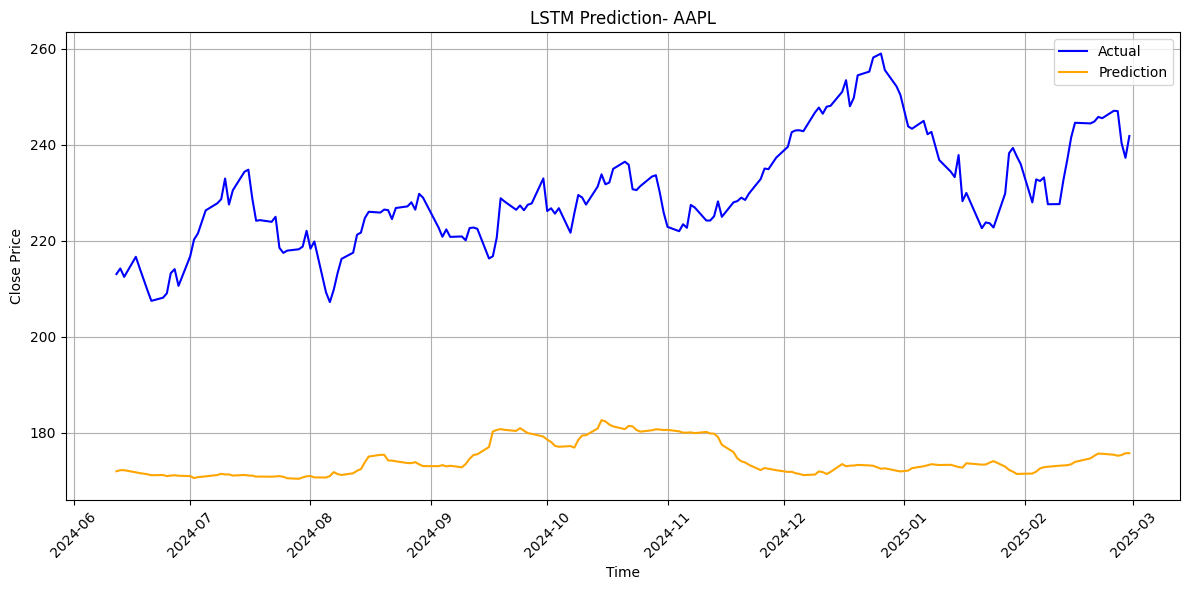

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x79a638fbaac0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  213.07  171.972839
 575 2024-06-13  214.24  172.197174
 576 2024-06-14  212.49  172.201965
 577 2024-06-17  216.67  171.744339
 578 2024-06-18  214.29  171.595459
 ..         ...     ...         ...
 748 2025-02-24  247.10  175.420410
 749 2025-02-25  247.04  175.208344
 750 2025-02-26  240.36  175.357147
 751 2025-02-27  237.30  175.737686
 752 2025-02-28  241.84  175.740128
 
 [179 rows x 3 columns])

In [ ]:
model_LSTM(Xtrain_AAPL1, ytrain_AAPL1, XTest_AAPL1, yTest_AAPL1,
    batch_size = 16,
    epochs = 200,
    optimizer = 'Adam',
    date_test=df_AAPL['date'].iloc[train_size+10:],
    date_train=df_AAPL['date'].iloc[:train_size-10],
    label_name='AAPL')

##MSFT

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9715
MSE Train:       103.7419
RMSE Train:      10.1854
MAE Train:       8.2278
MAPE Train:      0.0269
-----------------------------


-----------------------------
Test
R2 Value Test:  -0.4893
MSE Test:       377.6740
RMSE Test:      19.4338
MAE Test:       14.5688
MAPE:           0.0333
-----------------------------


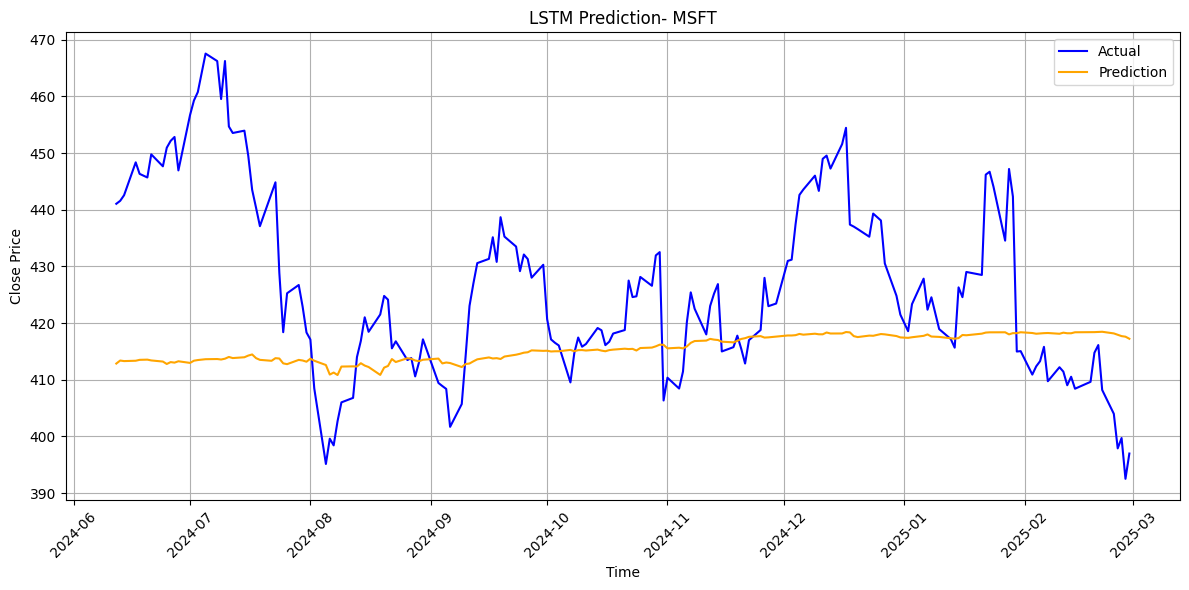

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x79a638b33740>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  441.06  412.865662
 575 2024-06-13  441.58  413.400482
 576 2024-06-14  442.57  413.301727
 577 2024-06-17  448.37  413.363434
 578 2024-06-18  446.34  413.521088
 ..         ...     ...         ...
 748 2025-02-24  404.00  418.185608
 749 2025-02-25  397.90  417.943695
 750 2025-02-26  399.73  417.708588
 751 2025-02-27  392.53  417.609314
 752 2025-02-28  396.99  417.243896
 
 [179 rows x 3 columns])

In [ ]:
model_LSTM(Xtrain_MSFT1, ytrain_MSFT1, XTest_MSFT1, yTest_MSFT1,
    batch_size = 16,
    epochs = 200,
    optimizer = 'Adam',
    date_test=df_MSFT['date'].iloc[train_size+10:],
    date_train=df_MSFT['date'].iloc[:train_size-10],
    label_name='MSFT')

##NVDA

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9898
MSE Train:       5.8386
RMSE Train:      2.4163
MAE Train:       1.7767
MAPE Train:      0.0585
-----------------------------


-----------------------------
Test
R2 Value Test:  -3.9178
MSE Test:       655.1773
RMSE Test:      25.5964
MAE Test:       23.9243
MAPE:           0.1808
-----------------------------


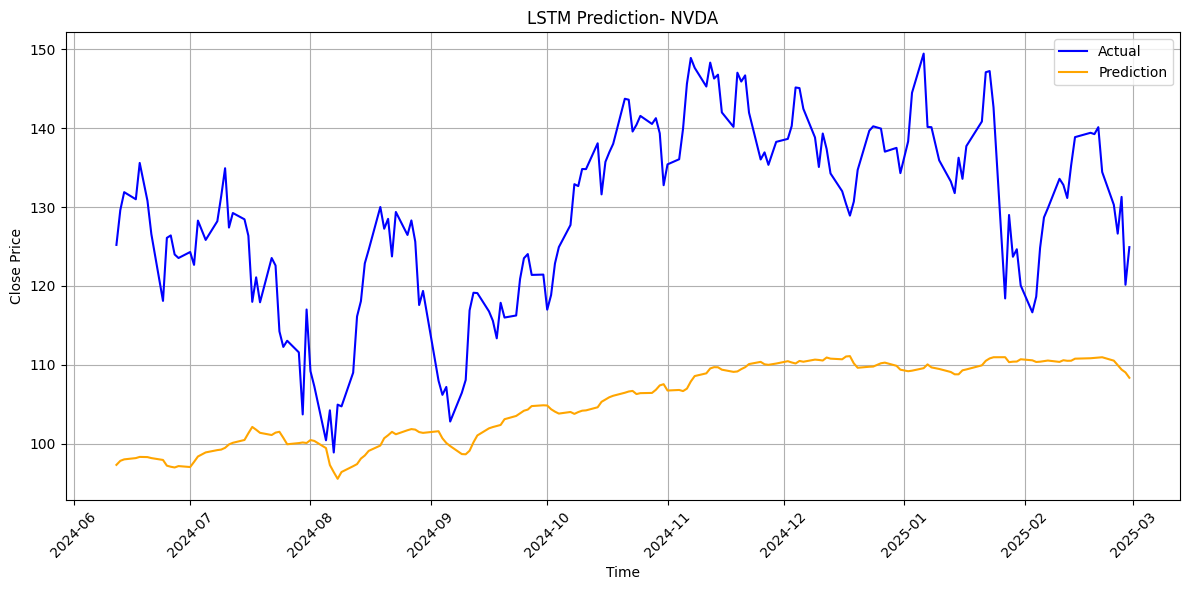

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x79a5b8378b80>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=32
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  125.20   97.339104
 575 2024-06-13  129.61   97.850792
 576 2024-06-14  131.88   98.038422
 577 2024-06-17  130.98   98.198738
 578 2024-06-18  135.58   98.349815
 ..         ...     ...         ...
 748 2025-02-24  130.28  110.539505
 749 2025-02-25  126.63  109.975510
 750 2025-02-26  131.28  109.409866
 751 2025-02-27  120.15  109.049828
 752 2025-02-28  124.92  108.372993
 
 [179 rows x 3 columns])

In [ ]:
model_LSTM(Xtrain_NVDA1, ytrain_NVDA1, XTest_NVDA1, yTest_NVDA1,
    batch_size = 32,
    epochs = 200,
    optimizer = 'AdamW',
    date_test=df_NVDA['date'].iloc[train_size+10:],
    date_train=df_NVDA['date'].iloc[:train_size-10],
    label_name='NVDA')

##GOOG

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.8957
MSE Train:       45.1126
RMSE Train:      6.7166
MAE Train:       5.1699
MAPE Train:      0.0417
-----------------------------


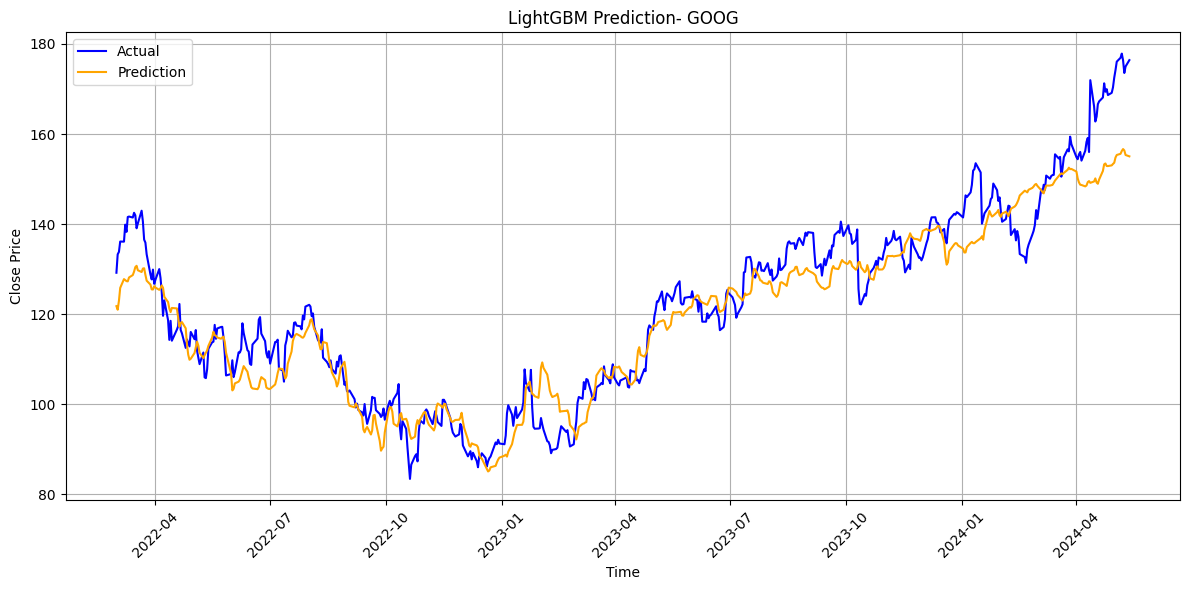

-----------------------------
Test
R2 Value Test:  -0.3216
MSE Test:       226.4054
RMSE Test:      15.0468
MAE Test:       11.4414
MAPE:           0.0618
-----------------------------


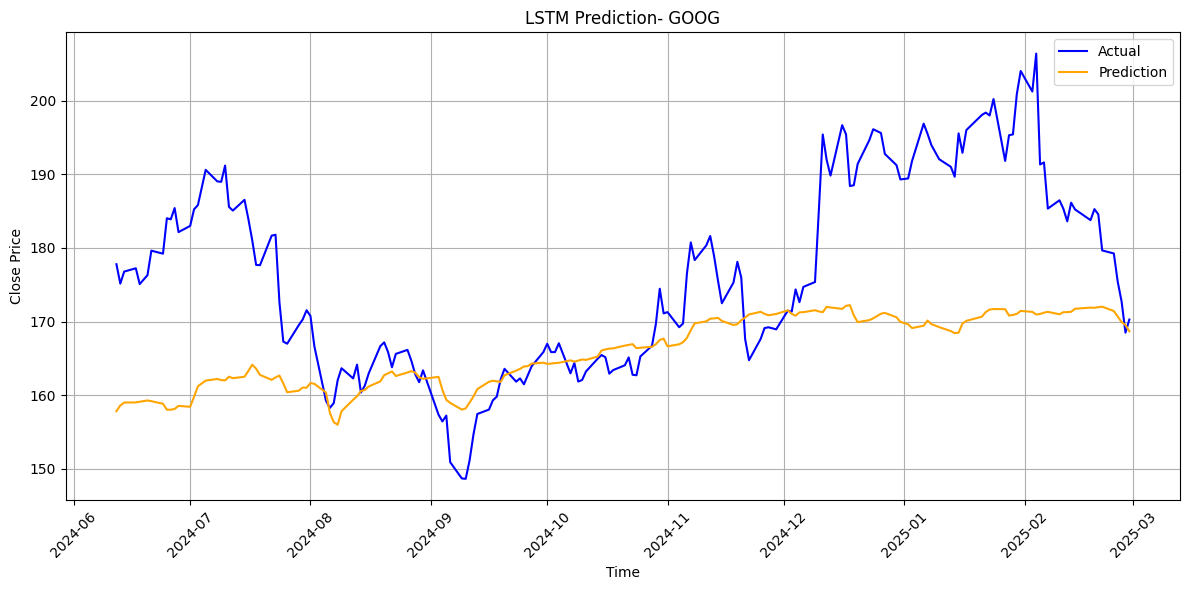

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x79a5b0764e00>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=100
 ),
           date  actual  prediction
 574 2024-06-12  177.79  157.838303
 575 2024-06-13  175.16  158.619476
 576 2024-06-14  176.79  159.012817
 577 2024-06-17  177.24  159.032837
 578 2024-06-18  175.09  159.122650
 ..         ...     ...         ...
 748 2025-02-24  179.25  171.435806
 749 2025-02-25  175.42  170.672928
 750 2025-02-26  172.73  169.936157
 751 2025-02-27  168.50  169.534210
 752 2025-02-28  170.28  168.686234
 
 [179 rows x 3 columns])

In [ ]:
model_LSTM(Xtrain_GOOG1, ytrain_GOOG1, XTest_GOOG1, yTest_GOOG1,
    batch_size = 16,
    epochs = 100,
    optimizer = 'Adam',
    date_test=df_GOOG['date'].iloc[train_size+10:],
    date_train=df_GOOG['date'].iloc[:train_size-10],
    label_name='GOOG')